<a href="https://colab.research.google.com/github/FFarhangian/SalesAI-Forecasting-and-Insights/blob/main/MoovAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sales Forecasting & Strategic Insight for Store Managers**
---



## **Business Context**

In today’s competitive retail environment, store managers are constantly seeking effective strategies to increase their sales and profitability. They often turn to historical sales data to make data-driven decisions on **how, when, where, and what to sell — and at what price**.




To support this, we have access to a dataset named `stores_sales_forecasting.csv` containing historical sales records from multiple stores, in different level:

- Orders-level
- Customers-level
- Products-level


This dataset serves as the foundation for Exploratory Data Analysis (EDA) and
building a **machine learning solution** aimed at forecasting future sales and generating actionable insights in order to make decisions on **how, when, where, and what to sell — and at what price**.

---

## **Project Objectives**

This project aims to empower store managers, analysts, and business decision-makers through a complete data science and AI-powered solution, with the following key objectives:

- **Extract Actionable Insights through Data Mining**  
  Perform multi-level analysis (order-level, product-level, and customer-level) to uncover hidden patterns and generate insights that can inform marketing strategies, pricing decisions, and inventory planning. Build an interactive dashboard using `Plotly` and `Streamlit` to communicate the most important findings and KPIs.

- **Forecast Sales using Machine Learning**  
  Develop an end-to-end ML pipeline (supervised and/or unsupervised) in Python to help store managers predict future sales trends across various dimensions: product category, customer segment, and regional breakdowns.

- **Integrate Generative AI for Insight Explanation**  
  Enhance the dashboard with **Generative AI capabilities** using `LangChain` and the `OpenAI API`. This feature will allow non-technical users to:
  - Interact with the system via natural language
  - Ask questions about the data and analysis
  - Request explanations for specific plots or metrics
  - Make data-driven decisions without needing technical expertise

This combined system bridges **predictive analytics**, **business intelligence**, and **natural language understanding** — enabling smarter, faster, and more accessible decision-making across the organization.



# **Installations**

In [17]:
!pip install streamlit
!pip install langchain-community
!pip install langchain_experimental
!pip install mlflow
!pip install calplot
!pip install mlflow --quiet
!pip install mlxtend


ERROR: Operation cancelled by user
ERROR: Operation cancelled by user
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 143.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.0/677.0 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12/12 [mlflow]
  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'calplot' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'calplot'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for calplot: filename=calplot-0.1.7.5-py3-none-any.whl size=8115 sha256=ec2d4b32099db75d0b42fe911a3115972fafea9ca18030

# **Packages**

In [18]:
# Standard Libraries
import os
import datetime as dt
import warnings

# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import calplot

# Date Handling
from pandas.tseries.holiday import USFederalHolidayCalendar
import calendar
import holidays

# Machine Learning & Forecasting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Clustering / Unsupervised Learning
from sklearn.cluster import KMeans

# Time Series
import statsmodels.api as sm
from prophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose


# LLM & Generative AI Integration
import openai
from langchain.llms import OpenAI
from langchain_experimental.agents import create_pandas_dataframe_agent

# App/Dashboard
import streamlit as st
import streamlit.components.v1 as components

import itertools
import statsmodels.api as sm
import mlflow
import mlflow.sklearn
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import tempfile
import joblib
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from matplotlib import pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules



# Mount data from google drive
from google.colab import drive
drive.mount('/content/gdrive')

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')



Mounted at /content/gdrive


# **Dataset**

To begin our analysis at `colab`, we load the dataset which is located on `Google Drive` using `pandas.read_csv`. We specify the encoding as `ISO-8859-1` instead of the default `UTF-8` to correctly parse any **accented characters or special symbols** in names, cities, or product descriptions. This avoids potential decoding errors during file import. Once the data is loaded, we proceed with:

- **Checking for missing values**  
- **Detecting duplicate rows**  
- **Printing column data types**  
- **Viewing summary statistics**, customized separately for:
  - Numeric columns (`int`, `float`)
  - Categorical columns (`object`)



| Column Name      | Description                                              |
|------------------|---------------------------------------------------------|
| Row ID           | Unique identifier for each row.                         |
| Order ID         | Unique identifier for each order.                       |
| Order Date       | The date when the order was placed.                     |
| Ship Date        | The date when the order was shipped.                    |
| Ship Mode        | The shipping method used for delivery.                  |
| Customer ID      | Unique identifier for each customer.                    |
| Customer Name    | Name of the customer who placed the order.              |
| Segment          | The market segment the customer belongs to.             |
| Country          | The country where the order was placed.                 |
| City             | The city where the order was placed.                    |
| State            | The state where the order was placed.                   |
| Postal Code      | The postal code for the shipping address.               |
| Region           | The region where the order originated.                  |
| Product ID       | Unique identifier for each product.                     |
| Category         | The main category of the product.                       |
| Sub-Category     | The sub-category of the product.                        |
| Product Name     | The name or description of the product.                 |
| Sales            | Total sales amount for the product line in the order.   |
| Quantity         | Number of units sold.                                   |
| Discount         | Discount applied to the product line.                   |
| Profit           | Net profit from the sale after discount and cost.       |


This dataset is very likely a subset of a larger one, as indicated by the non-sequential `Row ID` values, due to filtering by `Category`, `Country` or maybe `Time period`. So we drop `Row ID`, `Country`, `Category` becasue all the records are in **USA** and in category of **Furniture**.


The `Order Date` and `Ship Date` columns are stored as text (`object` type) by default. We will convert them to `datetime` objects to allow proper time-based analysis


In [19]:
file_path = "/content/gdrive/MyDrive/MoovAI/stores_sales_forecasting.csv" # Read CSV file
df = pd.read_csv(file_path, encoding="ISO-8859-1")

print("Dataset Shape:", df.shape)
print(df.head())

# Drop useless features
df.drop(columns=['Row ID'], inplace=True)
df.drop(columns=['Country'], inplace=True)
df.drop(columns=['Category'], inplace=True)

# Convert dates
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

Dataset Shape: (2121, 21)
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
3       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
4      11  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   

     Customer Name   Segment        Country             City  ... Postal Code  \
0      Claire Gute  Consumer  United States        Henderson  ...       42420   
1      Claire Gute  Consumer  United States        Henderson  ...       42420   
2   Sean O'Donnell  Consumer  United States  Fort Lauderdale  ...       33311   
3  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   
4  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   



In [20]:
# --- Dataset Overview ---
print("Dataset Shape:", df.shape)
print("\nColumn Data Types:\n")
print(df.dtypes)

# --- Missing Values ---
print("\nMissing Values per Column:\n")
print(df.isnull().sum())

# --- Duplicate Records ---
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

# --- Summary Stats for Numerical Columns ---
print("\nDescriptive Statistics (Numerical Columns):\n")
print(df.select_dtypes(include=["int64", "float64"]).describe().T)

# --- Summary Stats for Categorical Columns ---
print("\nValue Counts (Categorical Columns):\n")
for col in df.select_dtypes(include="object").columns:
    print(f"\n{col}:")
    print(df[col].value_counts(dropna=False))

Dataset Shape: (2121, 18)

Column Data Types:

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

Missing Values per Column:

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit     

# **Data Mining**

This dataset allows me to perform data mining at multiple levels:


1.   Order-level
2.   Product-level
3.   Customer-level



## **Order-Level**

### **Sales Forecasting Use Cases**

In practical business scenarios, sales forecasting is not a one-size-fits-all solution. It typically involves multiple perspectives:

1. **Forecast sales for a specific customer segment**  
   Example: How much will `Corporate` customers spend next month?

2. **Forecast sales for specific product–customer combinations**  
   Example: What’s the expected revenue from selling `Office Supplies` to `Home Office` customers?

3. **Forecast sales for specific geographic levels (Country, State, City, or Region)**
Example: How much will be sold in the West region next quarter?

4. **Forecast total sales for product categories or subcategories**  
   Example: What’s the monthly revenue outlook for `Furniture` products?

In this project we just focus on **monthly forecasting of overall sales** for `Furniture` category. While we explored several additional features in the dataset such as `Region`, `City`, `Segment`, and `Sub-Category` we made a deliberate decision not to include them in the forecasting model, for the following reasons:

- `City` and `State` columns are too **granular** and **sparse**. Including them would require careful aggregation or grouping to avoid unreliable patterns.
- `Segment`, `Sub-Category`, and `Region` do show different trends, but incorporating them would shift the problem toward a `multi-series forecasting` task, which is outside the scope of this project because of simplicity.

- Including such features in a low-data setting (only 48 months) increases the risk of overfitting, especially when using supervised machine learning or deep learning models, which typically require larger datasets to produce stable and generalizable forecasts. However, these features still provide strategic value for interpreting and acting on the forecasts — such as understanding underperforming months, planning targeted campaigns, and focusing on top-selling product categories.

- To keep the approach simple and robust, we retain only two columns: `Order Date` as the time index and `Sales` as the target. All other features are removed to reduce complexity, avoid overfitting, and focus on the core time series dynamics—namely trend and seasonality. This aligns with the business context, where monthly planning is the norm, daily data is noisy, and seasonal patterns (like holiday spikes) are more clearly observed at the monthly level. Additionally, monthly models are easier to tune, interpret, and communicate to stakeholders.


We therefore center our efforts on **monthly univariate forecasting** of Furniture sales — leveraging classical time series models such as: `SARIMA`, `Prophet`. Given the small dataset size, these models are better suited than machine learning or deep learning approaches. We will use time series *cross-validation* and *AIC/BIC* tuning to select optimal model parameters.

Order Date Range : 2014-01-06 → 2017-12-30


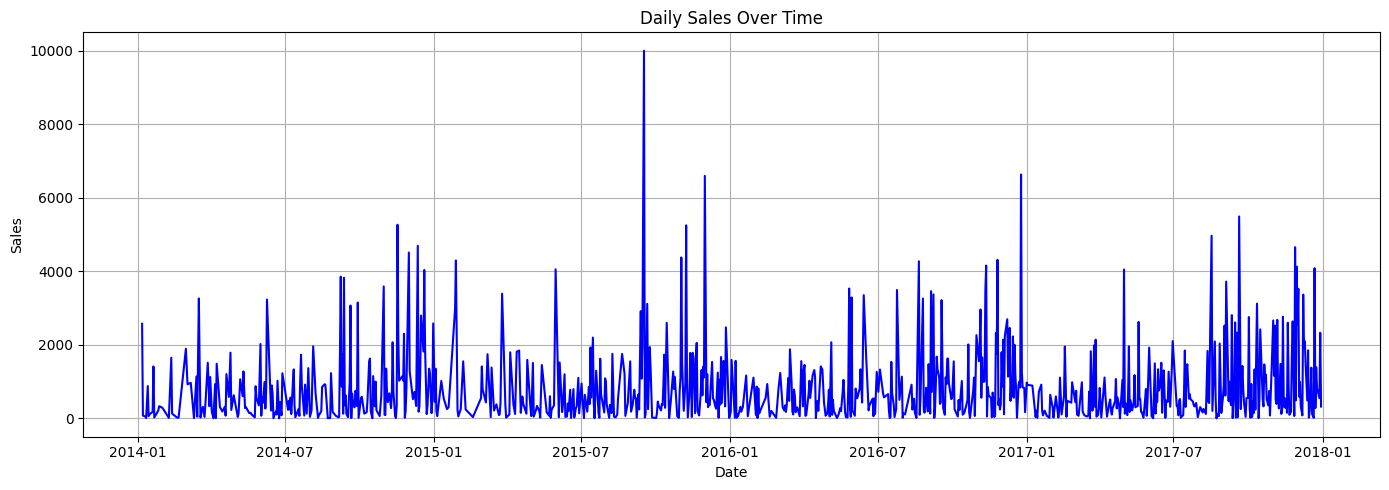

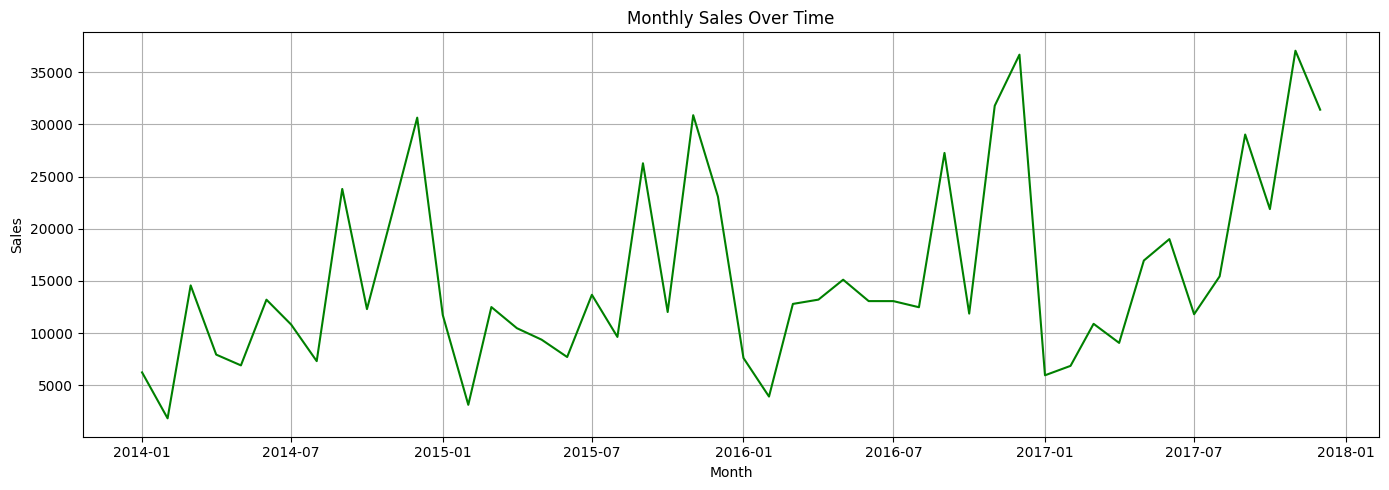

In [21]:
# Date ranges
order_start = df['Order Date'].min()
order_end = df['Order Date'].max()
print(f"Order Date Range : {order_start.date()} → {order_end.date()}")

# Preprocessing

# Drop irrelevant columns for forecasting
cols_to_drop = [
    'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name',
    'Segment', 'City', 'State', 'Postal Code', 'Region',
    'Product ID', 'Sub-Category', 'Product Name', 'Quantity',
    'Discount', 'Profit'
]
df1 = df.drop(columns=cols_to_drop)
df1 = df1.sort_values(by='Order Date')

# Daily sales
df_daily = df1.groupby('Order Date')['Sales'].sum().reset_index()
df_daily = df_daily.set_index('Order Date')

# Monthly sales (resample by Month Start)
df_monthly = df_daily.resample('MS').sum()

# --- Daily Sales Plot ---
plt.figure(figsize=(14, 5))
plt.plot(df_daily.index, df_daily['Sales'], label='Daily Sales', color='blue')
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Monthly Sales Plot ---
plt.figure(figsize=(14, 5))
plt.plot(df_monthly.index, df_monthly['Sales'], label='Monthly Sales', color='green')
plt.title("Monthly Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

# Add temporal features to daily data
df_daily = df_daily.reset_index()
df_daily['Order_Year'] = df_daily['Order Date'].dt.year
df_daily['Order_Month'] = df_daily['Order Date'].dt.month
df_daily['Order_Month_Name'] = df_daily['Order Date'].dt.month_name()
df_daily['Order_Weekday'] = df_daily['Order Date'].dt.dayofweek
df_daily['Order_Weekday_Name'] = df_daily['Order Date'].dt.day_name()
df_daily['Is_Weekend'] = df_daily['Order_Weekday'].isin([5, 6])

# US Holiday tag
us_holidays = USFederalHolidayCalendar().holidays(
    start=df_daily['Order Date'].min(),
    end=df_daily['Order Date'].max()
)
df_daily['Is_Holiday_US'] = df_daily['Order Date'].isin(us_holidays)

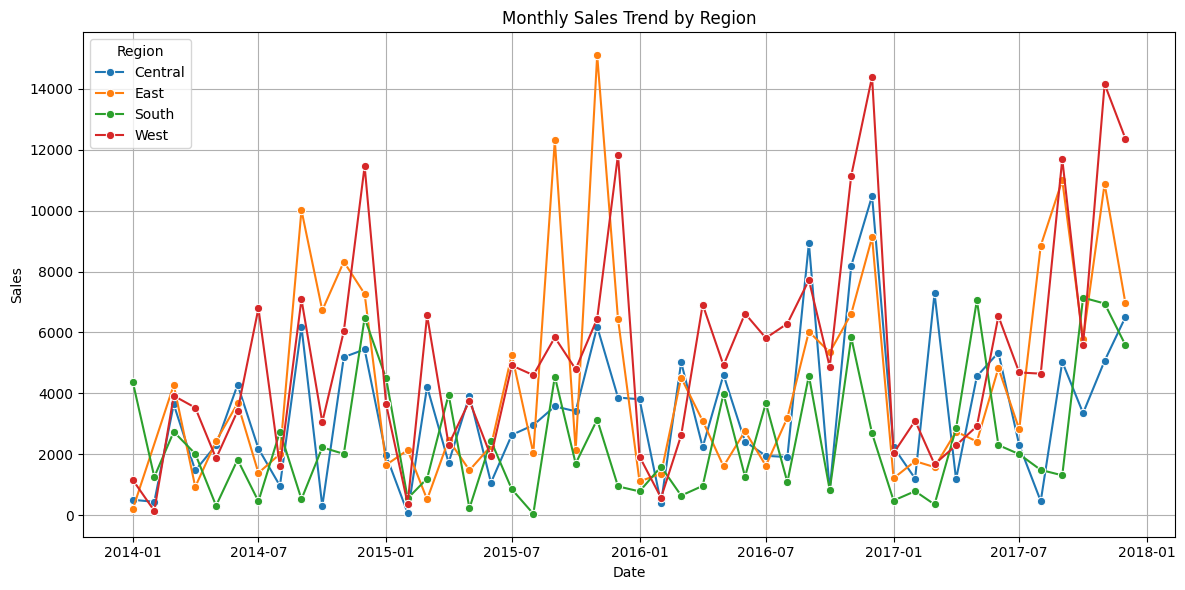

In [22]:
# Group sales monthly by Region
df_region_month = df.groupby(['Region', pd.Grouper(key='Order Date', freq='MS')])['Sales'].sum().reset_index()

# Plot sales trend per Region
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_region_month, x='Order Date', y='Sales', hue='Region', marker='o')
plt.title("Monthly Sales Trend by Region")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

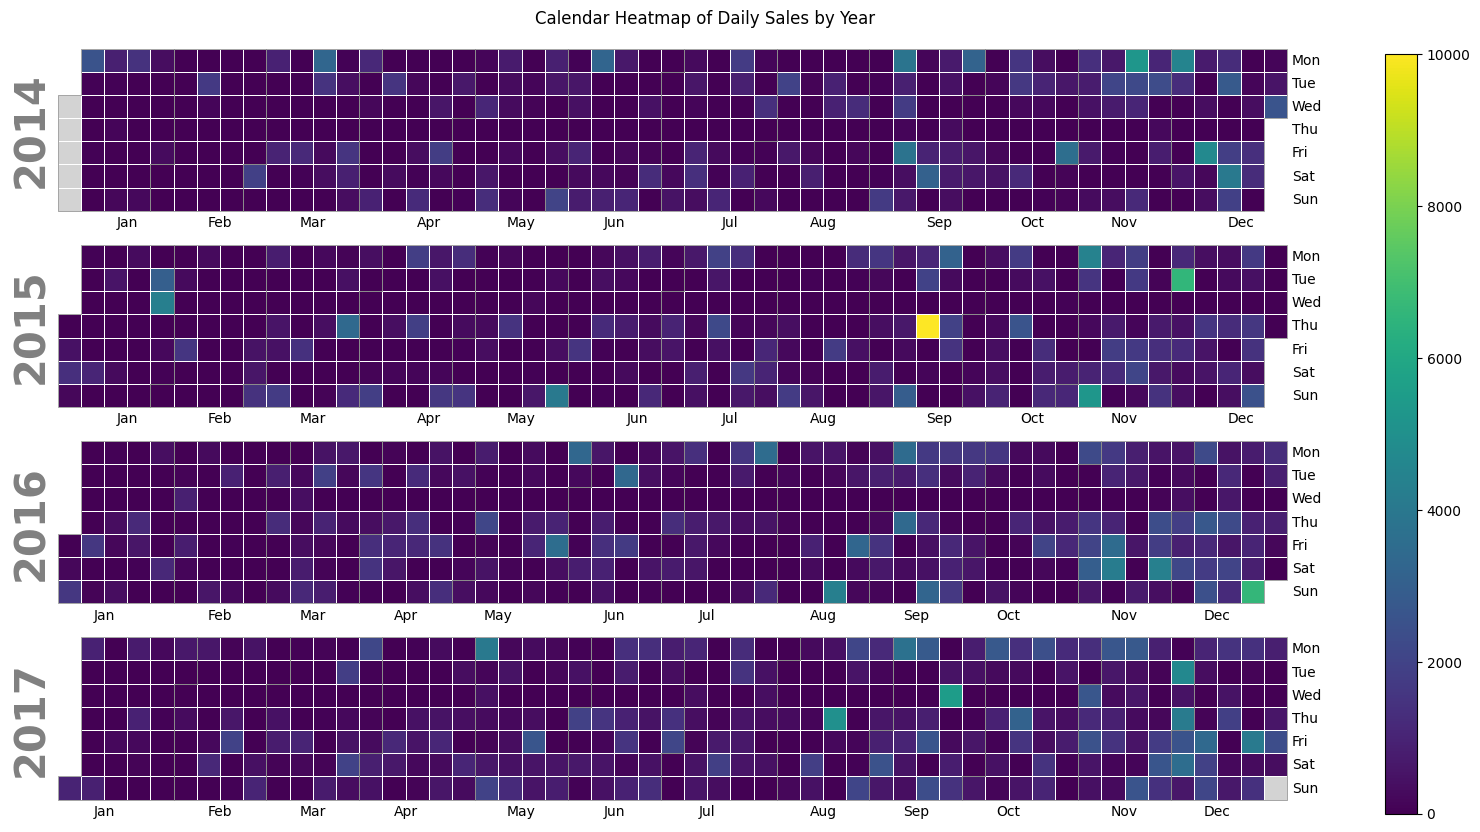

In [23]:
# --- Calendar Heatmap using calplot ---
# Convert back to Series (index=date, value=sales)
sales_series = df_daily.set_index('Order Date')['Sales']

# Plot all years in one heatmap like your image
calplot.calplot(
    sales_series,
    cmap='viridis',  # Or 'YlGnBu', 'Blues', etc.
    suptitle='Calendar Heatmap of Daily Sales by Year',
    colorbar=True,
    fillcolor='lightgray',
    linewidth=0.5,
    figsize=(16, 8)
)
plt.show()

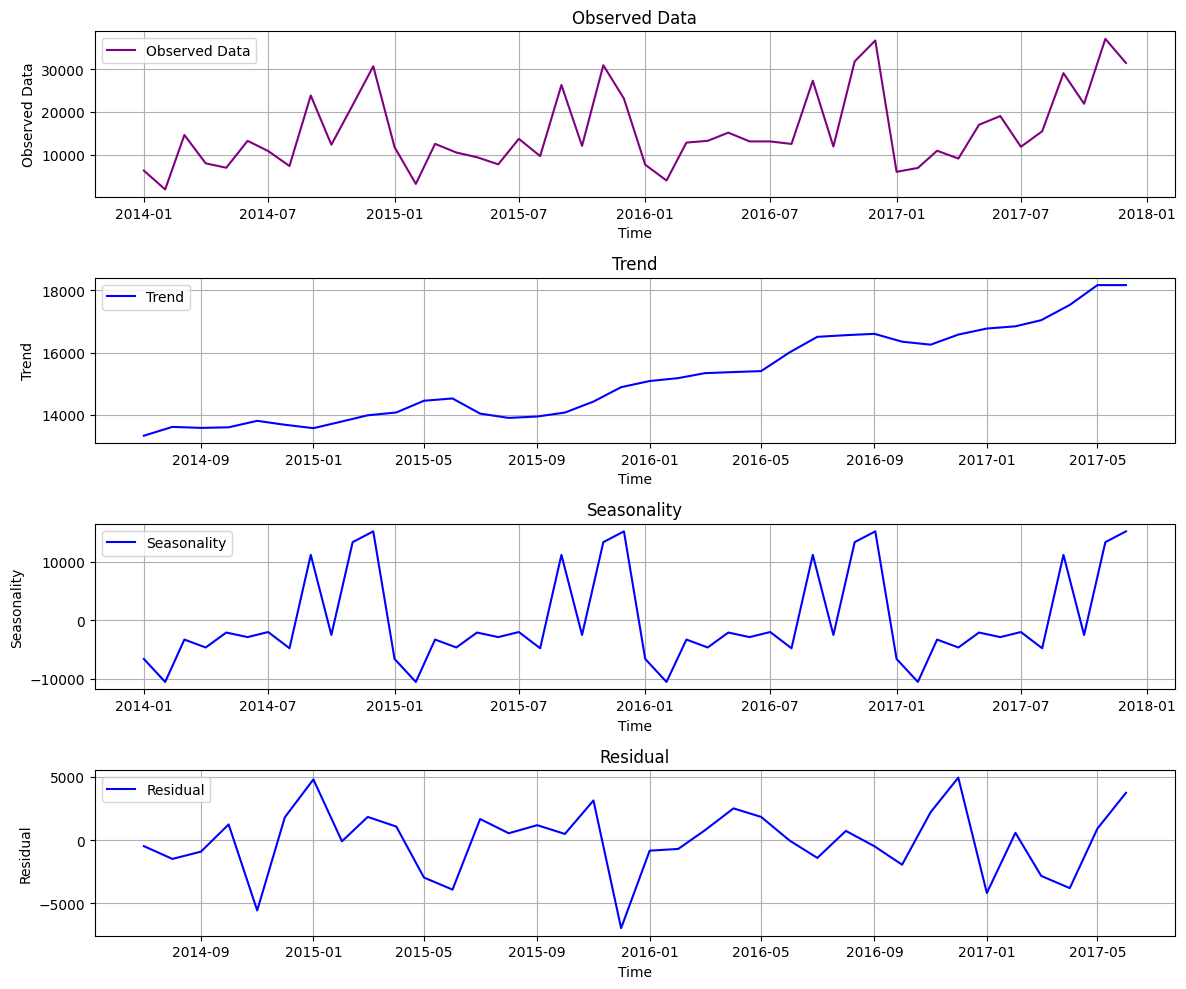

In [24]:
# ----- Seasonal Decomposition -----
# Drop missing values if any
df_monthly.dropna(inplace=True)

# Apply decomposition (additive model)
decomposition = sm.tsa.seasonal_decompose(df_monthly['Sales'], model='additive')

# Prepare components for plotting
components = [
    ('Observed Data', decomposition.observed),
    ('Trend', decomposition.trend),
    ('Seasonality', decomposition.seasonal),
    ('Residual', decomposition.resid)
]

# Plotting
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 10))
plt.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for ax, (label, data) in zip(axes, components):
    color = 'purple' if label == 'Observed Data' else 'blue'
    ax.plot(data, label=label, color=color)
    ax.set_xlabel('Time', fontsize=10)
    ax.set_ylabel(label, fontsize=10)
    ax.set_title(label, fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(True)

plt.tight_layout()
plt.show()

In [25]:
# ADF stationarity test
adf_result = adfuller(df_monthly['Sales'])
adf_statistic = adf_result[0]
adf_pvalue = adf_result[1]

(adf_statistic, adf_pvalue)


(-4.699026242828903, 8.450793985809654e-05)

**Observed**: The original sales values, clearly fluctuating over time.

**Trend**: Shows a mild upward trajectory, indicating gradual growth in furniture sales over the 4-year period.

**Seasonality**: A recurring annual pattern is visible—sales spike during the end of the year (likely holiday effect), and dip mid-year.

**Residual**: Random noise without obvious structure, indicating that the trend and seasonality components explain most of the variation.


**ADF Statistic: -4.70**

**p-value: 0.0000845**


The p-value is well below 0.05, we reject the null hypothesis. The time series is stationary, meaning it has a consistent mean and variance over time.

The `SARIMAX` model (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors) is an advanced time series forecasting model that extends ARIMA by incorporating both seasonal components and optional external regressors. It is defined by two main sets of hyperparameters: the non-seasonal part `(p, d, q)` and the seasonal part `(P, D, Q, s)`. Here, p is the number of autoregressive terms (lags of the target), d is the number of differences to make the series stationary, and q is the number of moving average terms (lags of forecast errors). The seasonal parameters follow the same logic but model repeating patterns over a fixed seasonal cycle of length s (e.g., s=12 for yearly seasonality in monthly data). In this project, we use SARIMAX without exogenous variables, focusing purely on the Sales time series, as it offers a balance between interpretability, flexibility, and strong performance on small datasets with clear seasonality.

In [26]:
# Define parameter grid
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(p, d, q, [12]))

# Track best
best_score = float("inf")
best_params = None

# MLflow setup
mlflow.set_experiment("SARIMAX_Sales_Forecasting")
with mlflow.start_run(run_name=f"sarimax_tuning_{datetime.now().strftime('%Y%m%d_%H%M%S')}"):

    for param in pdq:
        for seasonal_param in seasonal_pdq:
            try:
                model = sm.tsa.statespace.SARIMAX(
                    df_monthly,
                    order=param,
                    seasonal_order=seasonal_param,
                    enforce_stationarity=False,
                    enforce_invertibility=False
                )
                results = model.fit(disp=False)

                aic = results.aic
                param_str = f"{param}_{seasonal_param}".replace(" ", "").replace(",", "_").replace("(", "").replace(")", "")
                mlflow.log_metric(f"AIC_{param_str}", aic)

                print(f"SARIMAX{param}x{seasonal_param}12 - AIC: {aic:.2f}")

                if aic < best_score:
                    best_score = aic
                    best_params = (param, seasonal_param)

            except Exception as e:
                print(f"Failed: SARIMAX{param}x{seasonal_param} → {e}")
                continue

    if best_params:
        mlflow.log_param("best_order", str(best_params[0]))
        mlflow.log_param("best_seasonal_order", str(best_params[1]))
        mlflow.log_metric("best_AIC", best_score)
        print(f"\nBest Model: SARIMAX{best_params[0]} x {best_params[1]}12 - AIC: {best_score:.2f}")
    else:
        print(" No valid model found. Please expand the grid or check the data.")

2025/07/25 15:41:49 INFO mlflow.tracking.fluent: Experiment with name 'SARIMAX_Sales_Forecasting' does not exist. Creating a new experiment.


SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC: 1056.72
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC: 1341.84
SARIMAX(0, 0, 0)x(0, 1, 0, 12)12 - AIC: 691.39
SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC: 458.13
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC: 711.25
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC: 1361.11
SARIMAX(0, 0, 0)x(1, 1, 0, 12)12 - AIC: 475.93
SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC: 455.26
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC: 1015.76
SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC: 5502.35
SARIMAX(0, 0, 1)x(0, 1, 0, 12)12 - AIC: 674.63
SARIMAX(0, 0, 1)x(0, 1, 1, 12)12 - AIC: 440.26
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC: 779.66
SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC: 4818.30
SARIMAX(0, 0, 1)x(1, 1, 0, 12)12 - AIC: 476.78
SARIMAX(0, 0, 1)x(1, 1, 1, 12)12 - AIC: 438.26
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC: 984.87
SARIMAX(0, 1, 0)x(0, 0, 1, 12)12 - AIC: 1635.76
SARIMAX(0, 1, 0)x(0, 1, 0, 12)12 - AIC: 695.20
SARIMAX(0, 1, 0)x(0, 1, 1, 12)12 - AIC: 448.33
SARIMAX(0, 1, 0)x(1, 0, 0, 12)12 - AIC: 715.00
SARIMA

### AIC: Akaike Information Criterion

**AIC (Akaike Information Criterion)** is a statistical metric used for model selection. It evaluates how well a model fits the data while penalizing unnecessary complexity. AIC balances **Goodness of fit** (likelihood) and **Model complexity** (penalizes overfitting). **Lower AIC values indicate a better model**. When comparing models, the one with the lowest AIC is preferred.


The best model identified by AIC is `SARIMAX(0, 1, 1) × (0, 1, 1, 12)` with an `AIC of 418.36`, suggesting that this configuration provides the most efficient balance between capturing the data’s trend and seasonality without overfitting.


In [27]:
# Step 2: Split into train and test sets
test_size = 6
train = df_monthly[:-test_size]
test = df_monthly[-test_size:]

# Step 3: Define best model from tuning
best_order = (0, 1, 1)
best_seasonal_order = (0, 1, 1, 12)

# Step 4: Train the SARIMAX model on training data
model = sm.tsa.statespace.SARIMAX(
    train,
    order=best_order,
    seasonal_order=best_seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)
results = model.fit()

In [28]:


# Step 5: Forecast test period and evaluate
forecast_test = results.get_forecast(steps=test_size)
predicted_test = forecast_test.predicted_mean
predicted_test.index = test.index

mae = mean_absolute_error(test, predicted_test)
mape = mean_absolute_percentage_error(test, predicted_test) * 100

In [29]:
# Step 6: Retrain model on full data
final_model = sm.tsa.statespace.SARIMAX(
    df_monthly,
    order=best_order,
    seasonal_order=best_seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)
final_results = final_model.fit()

# Step 7: Forecast next 6 months (unseen)
forecast_future = final_results.get_forecast(steps=6)
future_index = pd.date_range(df_monthly.index.max() + pd.DateOffset(months=1), periods=6, freq='MS')
forecast_future_df = pd.DataFrame({
    'Date': future_index,
    'Forecasted_Sales': forecast_future.predicted_mean.values
})

In [30]:
# Flatten forecasted and actual values to ensure 1D structure
predicted_test_flat = np.ravel(predicted_test.values)
actual_test_flat = np.ravel(test.values)

# Recreate the actual test DataFrame properly
actual_test_df = pd.DataFrame({
    'Date': test.index,
    'Forecasted_Sales': predicted_test_flat,
    'Actual_Sales': actual_test_flat
})

# Add evaluation metrics (constant for test rows)
actual_test_df['MAPE'] = mape
actual_test_df['MAE'] = mae

# Prepare the forecast future DataFrame again
forecast_future_df['Actual_Sales'] = np.nan
forecast_future_df['MAPE'] = np.nan
forecast_future_df['MAE'] = np.nan

# Combine actuals and future forecasts
final_df = pd.concat([actual_test_df, forecast_future_df], ignore_index=True)



In [31]:
final_df

,Date,Forecasted_Sales,Actual_Sales,MAPE,MAE
0,2017-07-01,15759.121749,11813.0220,16.918618,3634.112442
1,2017-08-01,14733.707392,15441.8740,16.918618,3634.112442
2,2017-09-01,29720.414351,29028.2060,16.918618,3634.112442
3,2017-10-01,14557.025896,21884.0682,16.918618,3634.112442
4,2017-11-01,34135.454846,37056.7150,16.918618,3634.112442
5,2017-12-01,37617.364286,31407.4668,16.918618,3634.112442
6,2018-01-01,9538.854459,NaN,NaN,NaN
7,2018-02-01,9264.621124,NaN,NaN,NaN
8,2018-03-01,14364.143498,NaN,NaN,NaN
9,2018-04-01,12874.459500,NaN,NaN,NaN


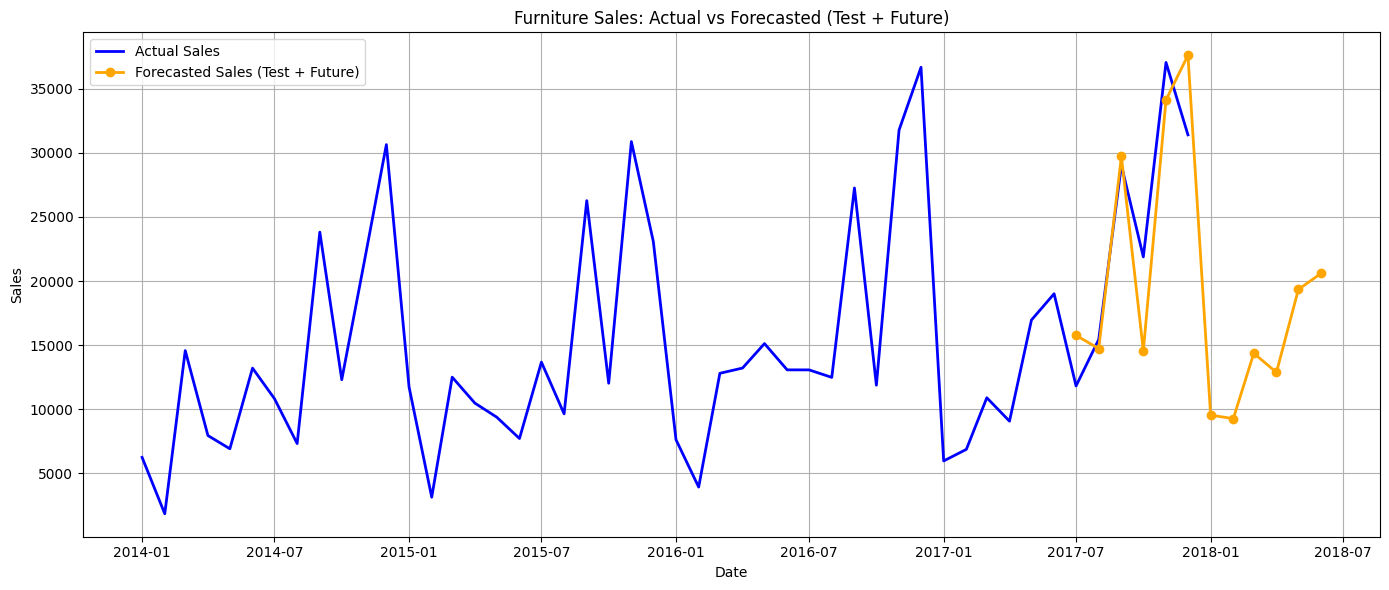

In [32]:


# Step 1: Reconstruct full timeline (actuals + forecasted)
full_index = df_monthly.index.tolist()
full_values = df_monthly.values.tolist()

# Forecast for test set (known actuals)
forecast_test = results.get_forecast(steps=6)
forecast_test_values = forecast_test.predicted_mean.values
forecast_test_index = test.index

# Forecast for unseen future
forecast_future = final_results.get_forecast(steps=6)
forecast_future_values = forecast_future.predicted_mean.values
forecast_future_index = pd.date_range(df_monthly.index.max() + pd.DateOffset(months=1), periods=6, freq='MS')

# Combine forecasts
forecast_values_combined = np.concatenate([forecast_test_values, forecast_future_values])
forecast_index_combined = forecast_test_index.append(forecast_future_index)

# Step 2: Plot
plt.figure(figsize=(14, 6))
plt.plot(full_index, full_values, label='Actual Sales', color='blue', linewidth=2)
plt.plot(forecast_index_combined, forecast_values_combined, label='Forecasted Sales (Test + Future)', color='orange', linewidth=2, marker='o')

# Final styling
plt.title("Furniture Sales: Actual vs Forecasted (Test + Future)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [33]:
# Set up MLflow experiment
mlflow.set_experiment("SARIMAX_Sales_Forecasting")

with mlflow.start_run(run_name=f"sarimax_final_{datetime.now().strftime('%Y%m%d_%H%M%S')}"):

    # Log parameters and metric
    mlflow.log_param("order", best_order)
    mlflow.log_param("seasonal_order", best_seasonal_order)
    mlflow.log_metric("AIC", results.aic)

    # Save model to temporary directory
    with tempfile.TemporaryDirectory() as temp_dir:
        model_path = f"{temp_dir}/sarimax_model.pkl"
        joblib.dump(results, model_path)
        mlflow.log_artifact(model_path, artifact_path="model")

    print("Model and parameters logged to MLflow")

Model and parameters logged to MLflow


### **SARIMAX Model Evaluation Summary**

| Metric  | Value       | Interpretation                                             |
|---------|-------------|------------------------------------------------------------|
| **MAE** | ~3,634      | On average, predictions are off by **$3.6K per month**     |
| **MAPE**| ~16.9%      | Forecasts are within **17% error**, acceptable for planning |

---

### **Evaluation Insights**

- Provides **reasonable accuracy** for high-level **monthly planning**.
- **~17% error margin** is acceptable for **strategic decisions** like budgeting.
- Forecast captures **seasonality and trend**, despite some volatility.

**Recommendation**:

Use promotions in low-demand periods to smooth revenue dips (e.g. off-season months).
Avoid unnecessary promotions during naturally high-performing months — let full-price sales drive profit.

## **Product-Level**

Once we forecast a drop in demand or sales, its essential to take actionable steps to mitigate this decline. To do so, we must make strategic use of the tools available — or as we say, **play the cards in our hand** — to drive sales growth. There are several potential strategies, including:

- Launching advertising campaigns

- Implementing promotional campaigns (e.g., discounts)

- Adjusting pricing strategies


In our dataset, we are limited to information on `Sales value` and `sales volume` per order, also `Profit`, `discount`, and `quantity` sold

Since prices remain constant over time in this dataset, we can derive the unit price per product (`SKU`) by dividing the sales value by the quantity. Furthermore, using the profit, discount, and sales quantity, we can back-calculate the `cost` per `SKU`, which allows us to compute the profit margin for each product.


### Strategic Focus: Increasing Sales Volume

To increase total sales value, we typically have two levers:

1. Increase the price

2. Increase the sales volume

However, raising prices risks **losing market share**. Therefore, this analysis focuses on increasing volume through targeted promotional discounts. But promotions must be optimized:

- Higher discounts should be allocated to high-margin SKUs.

- Lower discounts should be used on low-margin products.

- We must also assess the elasticity of each SKU — how responsive its sales volume is to changes in discount level.

# Key Business Metrics Definitions & Formulas

---

## 1. **Actual Price per SKU**

**Definition:**  
The actual selling price per unit of a product (SKU). If the product has discounts applied, it reflects the price *after discount*.

**Formula:**  `(Sales)/((1-discount)*quantity)`

## 2. **Cost per SKU**
**Definition:**  
The estimated cost to produce or acquire one unit of a product.

**Formulas:**  `(Quantity*Actual_price)*(1-dicount) - profit`

## 3. **Profit Margin per SKU**

**Definition:**  
The percentage of profit made on each unit sold, relative to its selling price.

**Formulas:**  

`Baseline_Margin = ((Actual_Ptice - Cost_SKU)/Actual_Price)*100`

`Actual_margin = ((price - total_cost)/price)*100`

## 4. **Elasticity of Discount. How Responsive Are Customers to Promotions?**

**Definition:**  
Elasticity measures how sensitive the **quantity sold** is to changes in the **discount level**. Specifically, in the context of promotions, we refer to **promotional elasticity** (or **discount elasticity**). It tells us whether increasing or decreasing discounts leads to a significant change in sales volume. Identify which SKUs respond well to discounts. Avoid wasting margin on SKUs with inelastic demand. Design targeted promotions based on product sensitivity.

**Formulas:**  

We use the **log-log model** to estimate elasticity:

$$
\text{Elasticity} = \frac{\\%\\ \text{change in Quantity}}{\\%\\ \text{change in Discount}} = \frac{d \log(Q)}{d \log(D)}
$$

In practice, this is estimated using linear regression:

$$
\log(Q) = \beta_0 + \beta_1 \log(D) + \varepsilon
$$

Where:
- \( Q \): Quantity sold  
- \( D \): Discount level  
- \(\beta_1 \): The **elasticity coefficient** for each product


---

- Elasticity < 0 → More discount → higher quantity sold (typical)

- Elasticity > 0 → More discount → lower sales (rare, could be a perception issue or over-discounting)

- |Elasticity| > 1 → Elastic (sensitive to discount)

- |Elasticity| < 1 → Inelastic (not very responsive to discount)


### **Feature Engineering and Preprocessing**

In [34]:
# comput actual price for each SKU
df['Actual_Price'] = df['Sales'] / ((1 - df['Discount']) * df['Quantity'])

# computing Total cost
df['Total_Cost'] = (df['Quantity'] * df['Actual_Price']) * (1 - df['Discount']) - df['Profit']

#Cost_SKU = Cost/Quantity
df['Cost_SKU'] = df['Total_Cost'] / df['Quantity']

# comput Baseline_Margin
df['Baseline_Margin'] = ((df['Actual_Price'] - df['Cost_SKU']) / df['Actual_Price']) * 100

# compute Actual_margin
df['Actual_margin'] = ((df['Sales'] - df['Total_Cost']) / df['Sales']) * 100


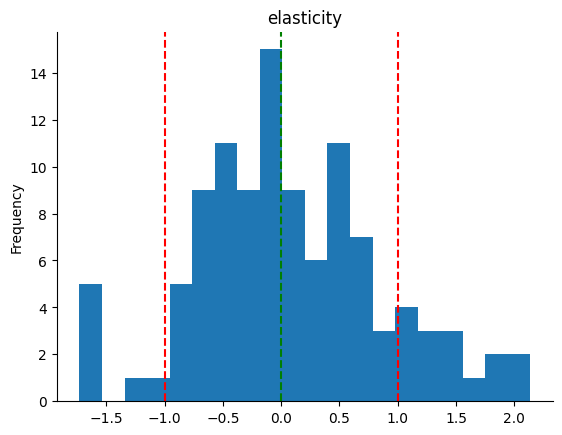

In [35]:
#Discount vs Quantity Elasticity

elasticities = []

for pid in df['Product ID'].unique():
    data = df[df['Product ID'] == pid].copy()
    data = data[(data['Discount'] > 0) & (data['Quantity'] > 0)]
    if len(data) >= 5:
        data['log_q'] = np.log(data['Quantity'])
        data['log_d'] = np.log(data['Discount'])
        X = sm.add_constant(data['log_d'])
        y = data['log_q']
        model = sm.OLS(y, X).fit()
        elasticities.append({'Product Id': pid, 'elasticity': model.params['log_d']})

df_elasticity = pd.DataFrame(elasticities)

df_elasticity.head()

df_elasticity['elasticity'].plot(kind='hist', bins=20, title='elasticity')
plt.gca().spines[['top', 'right',]].set_visible(False)
import matplotlib.pyplot as plt
plt.axvline(x=1, color='red', linestyle='--')
plt.axvline(x=-1, color='red', linestyle='--')
plt.axvline(x=0, color='green', linestyle='--')
plt.show()



In [36]:
# Set Seaborn style
sns.set(style='whitegrid')

def plot_margin_vs_discount(data, group_by=None, figsize=(12, 6), max_cols=2):
    """
    Plots Actual Margin and Baseline Margin vs. Discount, optionally grouped by a column.

    Parameters:
        data (DataFrame): The input DataFrame.
        group_by (str): Optional column name to group by (e.g., 'Sub-Category' or 'Region').
        figsize (tuple): Size of each subplot.
        max_cols (int): Number of columns per row in the subplot grid.
    """
    if group_by:
        grouped = data.groupby(['Discount', group_by]).agg({
            'Actual_margin': 'mean',
            'Baseline_Margin': 'mean'
        }).reset_index()

        categories = grouped[group_by].unique()
        n = len(categories)
        ncols = min(max_cols, n)
        nrows = -(-n // ncols)

        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(figsize[0]*ncols, figsize[1]*nrows), sharex=True, sharey=True)
        axes = axes.flatten()

        for i, cat in enumerate(categories):
            df_cat = grouped[grouped[group_by] == cat].sort_values('Discount')
            ax = axes[i]
            sns.lineplot(data=df_cat, x='Discount', y='Actual_margin', label='Actual Margin', ax=ax)
            sns.lineplot(data=df_cat, x='Discount', y='Baseline_Margin', label='Baseline Margin', ax=ax)
            ax.set_title(f'{group_by}: {cat}')
            ax.set_xlabel('Discount')
            ax.set_ylabel('Margin (%)')
            ax.legend()
            ax.grid(True)

        # Hide unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()

    else:
        grouped = data.groupby('Discount').agg({
            'Actual_margin': 'mean',
            'Baseline_Margin': 'mean'
        }).reset_index().sort_values('Discount')

        plt.figure(figsize=figsize)
        sns.lineplot(data=grouped, x='Discount', y='Actual_margin', label='Actual Margin')
        sns.lineplot(data=grouped, x='Discount', y='Baseline_Margin', label='Baseline Margin')
        plt.title('Actual Margin and Baseline Margin vs. Discount')
        plt.xlabel('Discount')
        plt.ylabel('Margin (%)')
        plt.legend()
        plt.grid(True)
        plt.show()


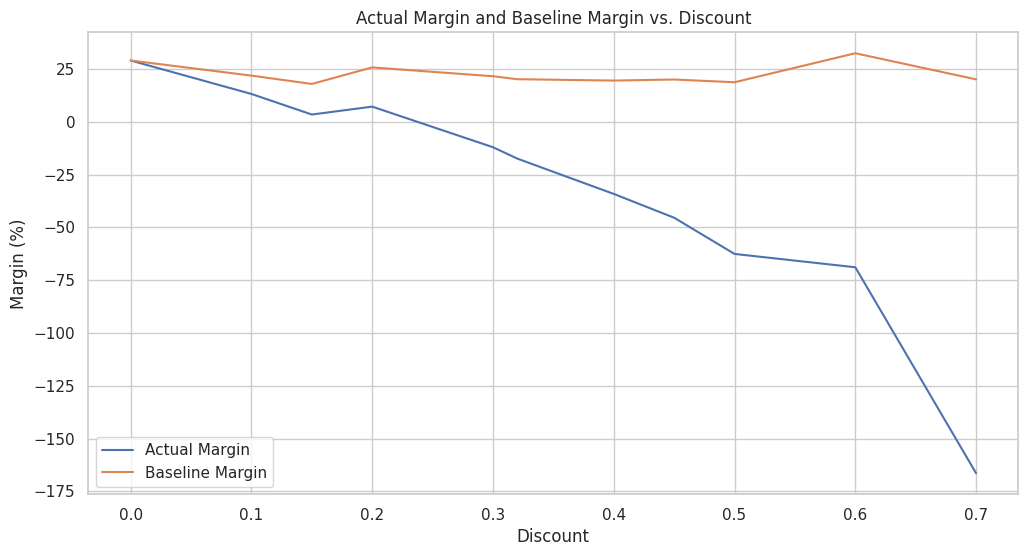

In [37]:
plot_margin_vs_discount(df)

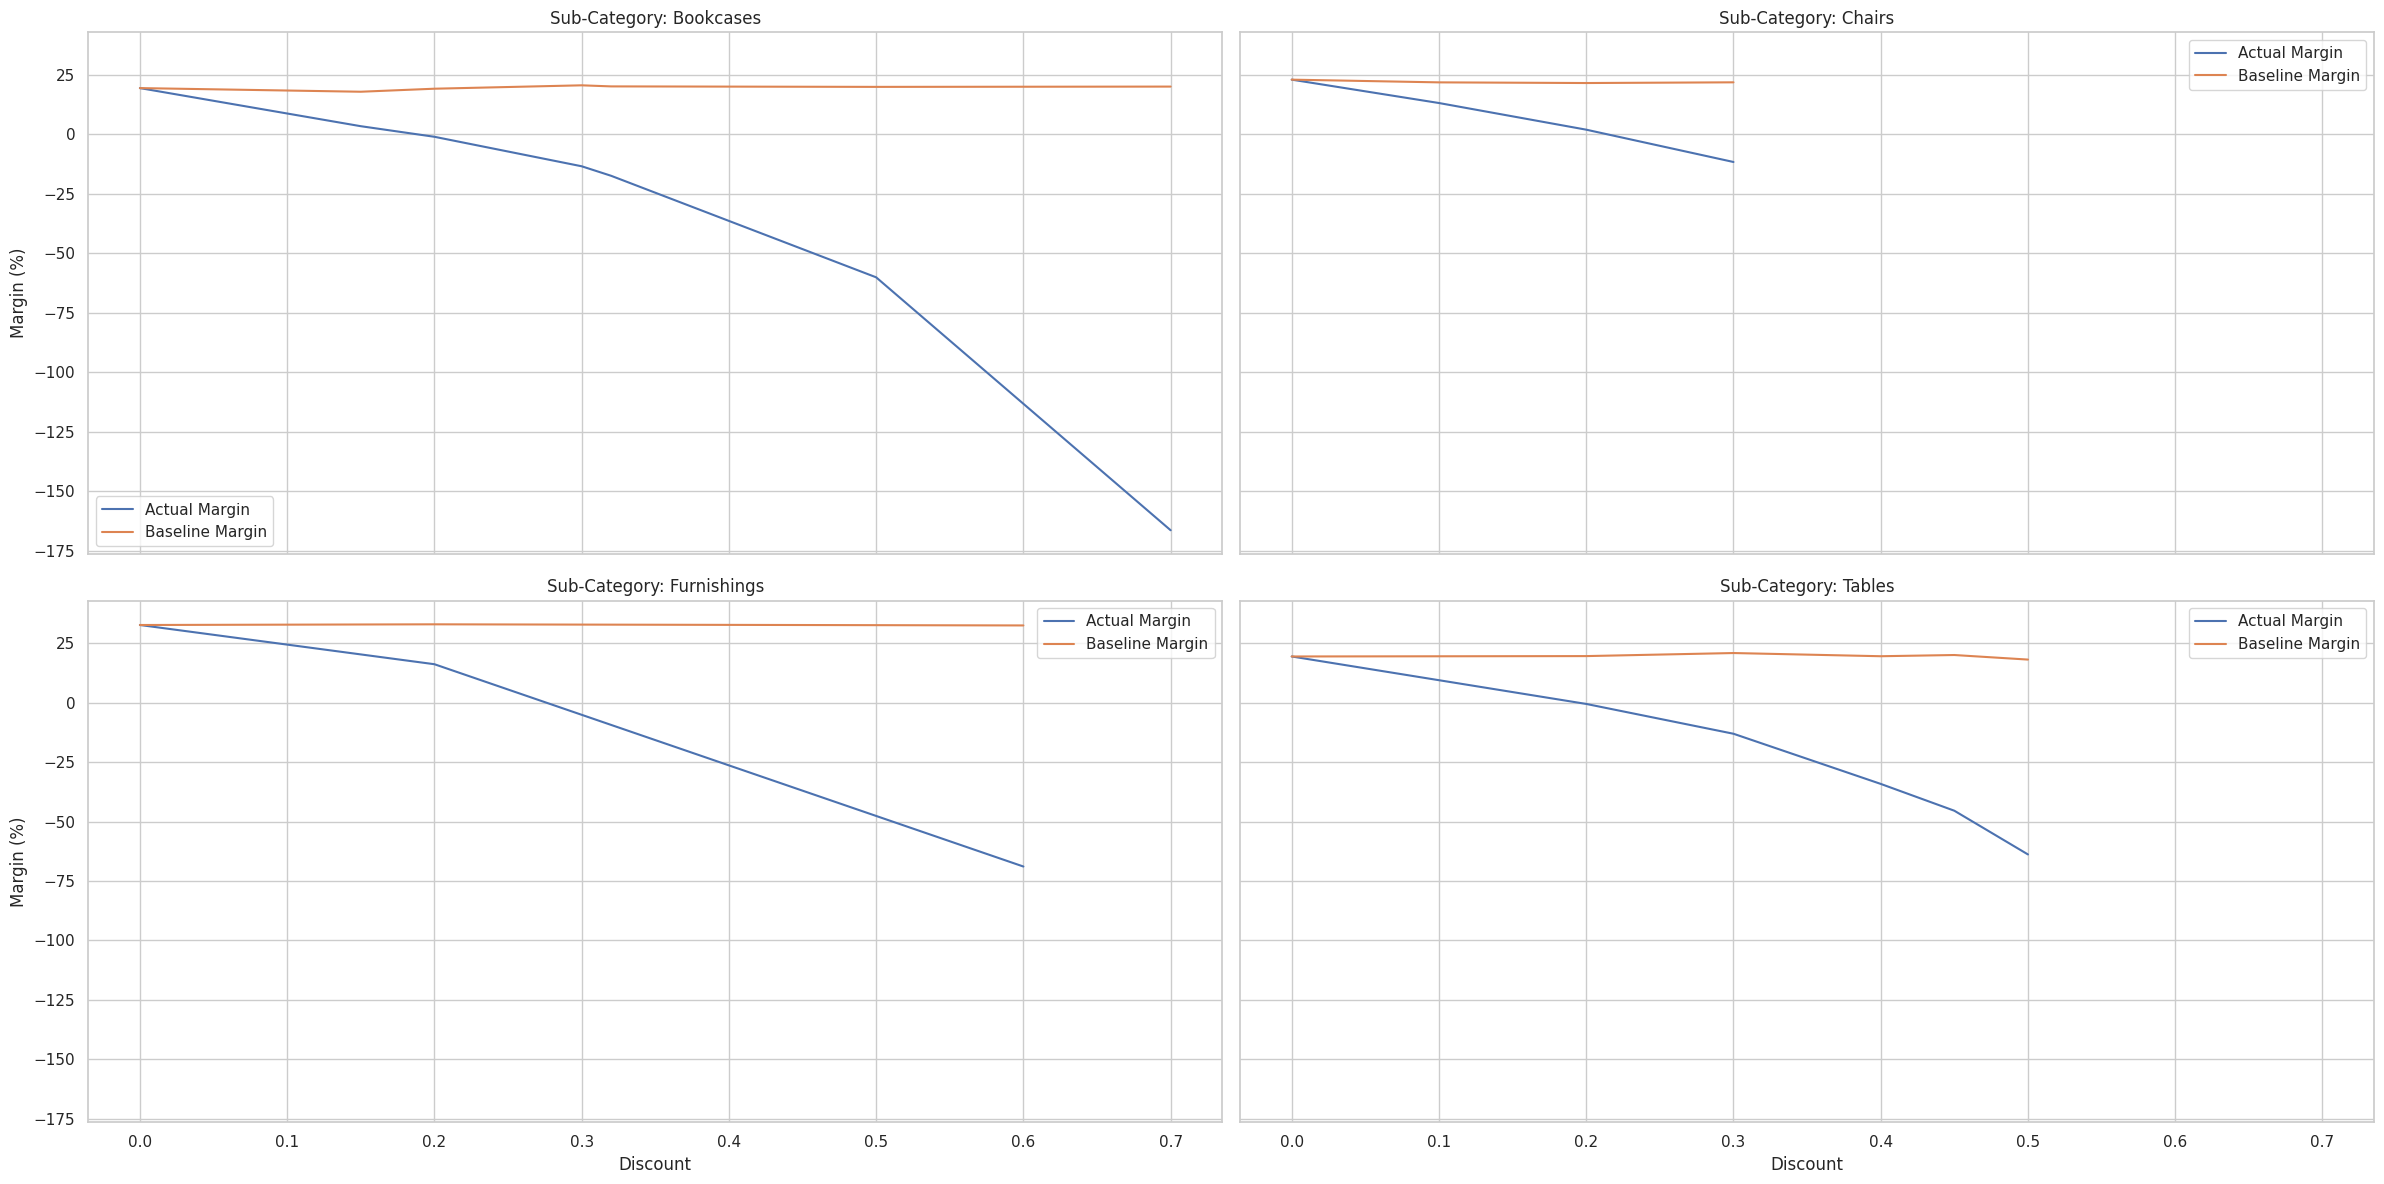

In [38]:
plot_margin_vs_discount(df, group_by='Sub-Category')


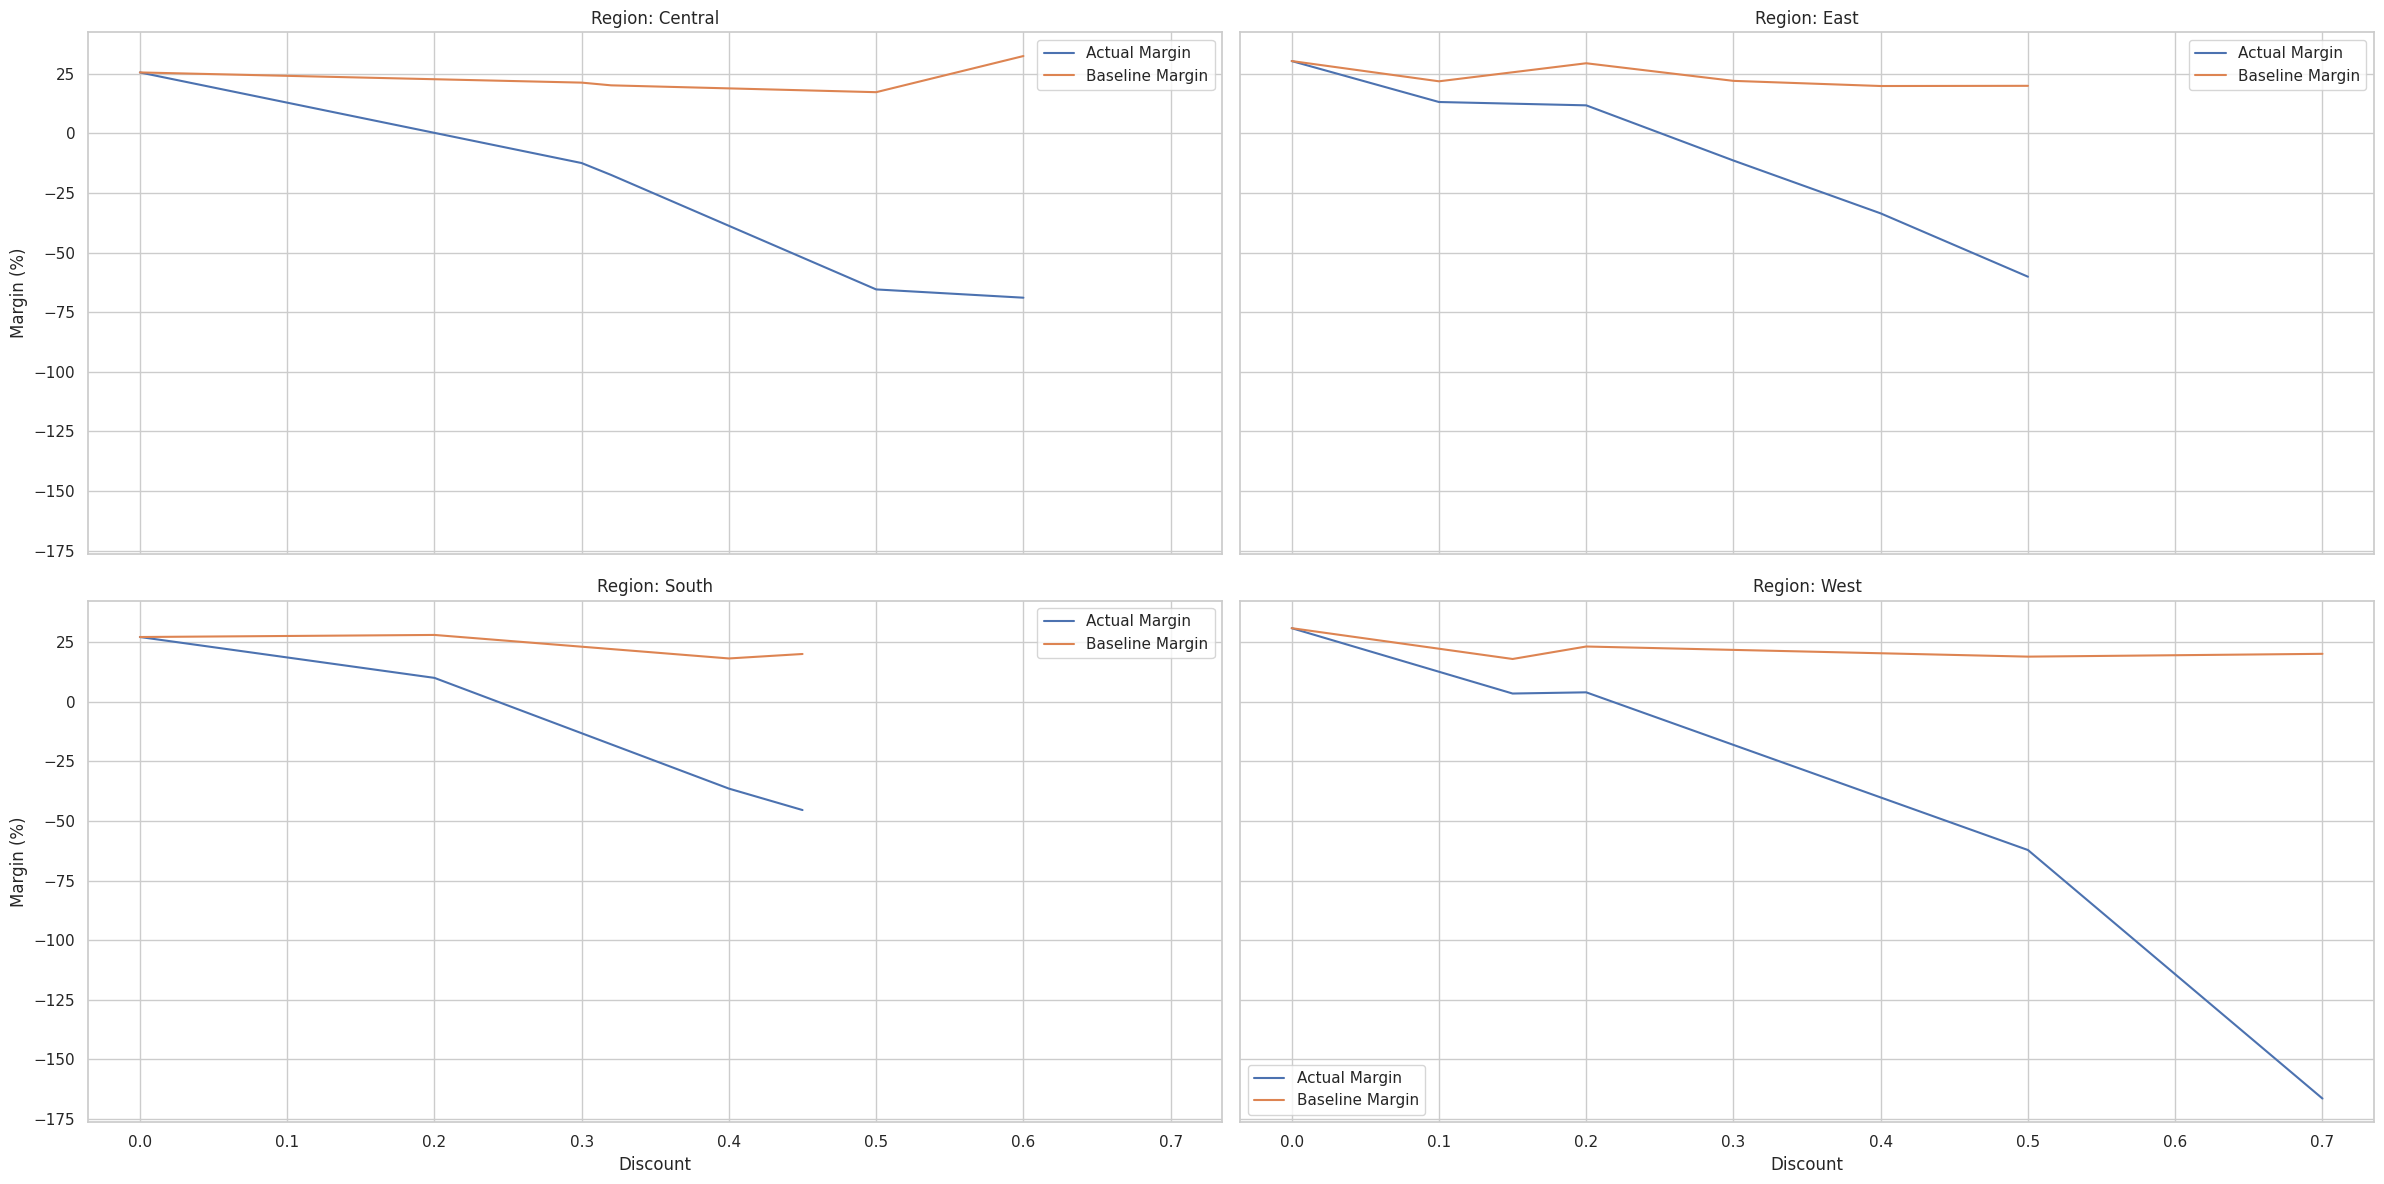

In [39]:
plot_margin_vs_discount(df, group_by='Region')


### **What Products to Promote**

- Some products show high elasticity: even small discounts cause big volume increases.

- Others are inelastic: discounts reduce margin without boosting sales.

- Some products have already low baseline margins — further discounting them is damaging.

**Recommendation:**

- Promote high-elasticity, high-margin products → best Risk of loss.

- Avoid promoting inelastic or low-margin products → risk of loss.

- Consider differentiated discounts per product type rather than a blanket strategy.


### **Where to Promote**

- Some regions respond better to discounts, maintaining healthier margins post-discount.

- Others experience margin collapse without sales lift.

Recommendation:

- Focus promotions in regions with higher responsiveness to discounting.

- In low-performing or discount-insensitive regions, explore loyalty programs or bundles instead.



## **To Whom**

- Some customer groups (e.g. deal-seekers) are price-sensitive.

- Others (e.g. premium buyers) care more about value or convenience than price.

**Recommendation:**

- Use targeted promotions: email campaigns, loyalty rewards, or app-only discounts for price-sensitive customers.

- Offer exclusive services, early access, or bundles for high-LTV or premium segments.

### **Product Segmentation**

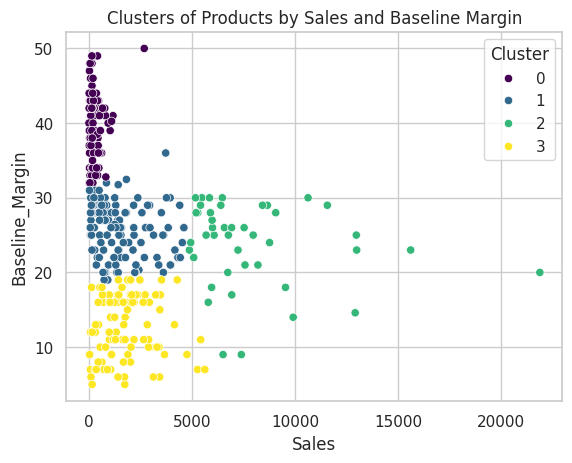

         count      mean       std  min  25%  50%  75%  max
Cluster                                                    
0        569.0  0.140598  0.207399  0.0  0.0  0.0  0.2  0.6
1        704.0  0.168636  0.171972  0.0  0.0  0.2  0.3  0.7
2        335.0  0.195731  0.143604  0.0  0.1  0.2  0.3  0.7
3        513.0  0.203899  0.179470  0.0  0.0  0.2  0.3  0.7


In [40]:
# Step 1: Aggregate at product level
product_summary = df.groupby("Product ID").agg({
    "Cost_SKU": "mean",  # Price per unit
    "Actual_margin": "mean",
    "Baseline_Margin": "mean",
    "Sales": "sum",
    "Discount": "mean",  # Mean discount per product
    "Profit": "sum",
    "Quantity": "sum",
}).reset_index()

# Step 2: Compute derived metrics
product_summary["Average_Price_per_SKU"] = product_summary["Sales"] / product_summary["Quantity"]
product_summary["Margin_Loss"] = product_summary["Baseline_Margin"] - product_summary["Actual_margin"]

# Step 3: Scaling selected features
features = ["Sales", "Baseline_Margin"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(product_summary[features])

# Step 4: Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
product_summary["Cluster"] = kmeans.fit_predict(X_scaled)

# Step 5: Visualization
sns.scatterplot(
    data=product_summary,
    x="Sales",
    y="Baseline_Margin",
    hue="Cluster",
    palette="viridis"
)
plt.title("Clusters of Products by Sales and Baseline Margin")
plt.show()

# Step 6: Merge cluster labels back to the original df (this must be done before grouping by 'Cluster')
df = pd.merge(df, product_summary[["Product ID", "Cluster"]], on="Product ID", how="left")

# Now this line will work because 'Cluster' is present in df
cluster_discount_summary = df.groupby('Cluster')["Discount"].describe()
print(cluster_discount_summary)

# Step 7: Export
df.to_csv('df_with_clusters.csv', index=False)

### **Association Rules**

Association Rule Mining — Understanding Customer Purchase Patterns. This section uncovers relationships between products frequently bought together using **Apriori** and **Association Rules**.

### Key Metrics Explained

- **Support**: Probability that items in a rule (antecedent + consequent) occur together.  

  $$
  \text{Support}(A \rightarrow B) = \frac{\text{Transactions containing both } A \text{ and } B}{\text{Total Transactions}}
  $$

- **Confidence**: Probability of purchasing the consequent item **given** the antecedent is purchased.

  $$
  \text{Confidence}(A \rightarrow B) = \frac{\text{Support}(A \cup B)}{\text{Support}(A)}
  $$

- **Lift**: Measures how much more often A and B occur together **compared to** if they were independent.

  $$
  \text{Lift}(A \rightarrow B) = \frac{\text{Confidence}(A \rightarrow B)}{\text{Support}(B)}
  $$

  - **Lift > 1**: Positive association (items are bought together more than expected by chance)  
  - **Lift = 1**: No association  
  - **Lift < 1**: Negative association  


In [ ]:
basket = df.groupby(['Order ID', 'Product ID'])['Quantity'].sum().unstack().reset_index().fillna(0)
basket.set_index('Order ID', inplace=True)
# Convert quantities to binary (presence/absence)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Apply the apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.00056, use_colnames=True)
# Display the frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets.head())

# Find association rules from the frequent itemsets
# The metric to evaluate the rules (e.g., 'lift', 'confidence', 'support')
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the association rules
print("\nAssociation Rules:")
print(rules.head())

rules = rules.sort_values(by='lift', ascending=False)
print("\nTop Association Rules by Lift:")
print(rules.head())


Frequent Itemsets:
    support           itemsets
0  0.000567  (FUR-BO-10000112)
1  0.001701  (FUR-BO-10000330)
2  0.002834  (FUR-BO-10000362)
3  0.003401  (FUR-BO-10000468)
4  0.001134  (FUR-BO-10000711)

Association Rules:
         antecedents        consequents  antecedent support  \
0  (FUR-BO-10000330)  (FUR-BO-10003159)            0.001701   
1  (FUR-BO-10003159)  (FUR-BO-10000330)            0.003968   
2  (FUR-FU-10001731)  (FUR-BO-10000330)            0.004535   
3  (FUR-BO-10000330)  (FUR-FU-10001731)            0.001701   
4  (FUR-BO-10000362)  (FUR-CH-10004218)            0.002834   

   consequent support   support  confidence  lift  representativity  leverage  \
0            0.003968  0.000567    0.333333  84.0               1.0  0.000560   
1            0.001701  0.000567    0.142857  84.0               1.0  0.000560   
2            0.001701  0.000567    0.125000  73.5               1.0  0.000559   
3            0.004535  0.000567    0.333333  73.5               1.0  0.0


Association Rules involving 'FUR-BO-10001798':
    antecedents_str  consequents_str   support  confidence   lift
30  FUR-BO-10001798  FUR-CH-10000454  0.000567    0.250000  36.75
31  FUR-CH-10000454  FUR-BO-10001798  0.000567    0.083333  36.75

Association Rules leading to 'FUR-BO-10001798':
    antecedents_str  consequents_str   support  confidence   lift
31  FUR-CH-10000454  FUR-BO-10001798  0.000567    0.083333  36.75

Association Rules starting from 'FUR-BO-10001798':
    antecedents_str  consequents_str   support  confidence   lift
30  FUR-BO-10001798  FUR-CH-10000454  0.000567        0.25  36.75

Top 10 Frequent Items (by support):
      support           itemsets
295  0.009070  (FUR-FU-10004270)
65   0.008503  (FUR-CH-10001146)
93   0.008503  (FUR-CH-10002647)
110  0.007937  (FUR-CH-10003774)
97   0.007937  (FUR-CH-10002880)
183  0.007937  (FUR-FU-10001473)
121  0.007370  (FUR-CH-10004287)
311  0.007370  (FUR-FU-10004864)
325  0.007370  (FUR-TA-10001095)
317  0.006803  (FUR-FU

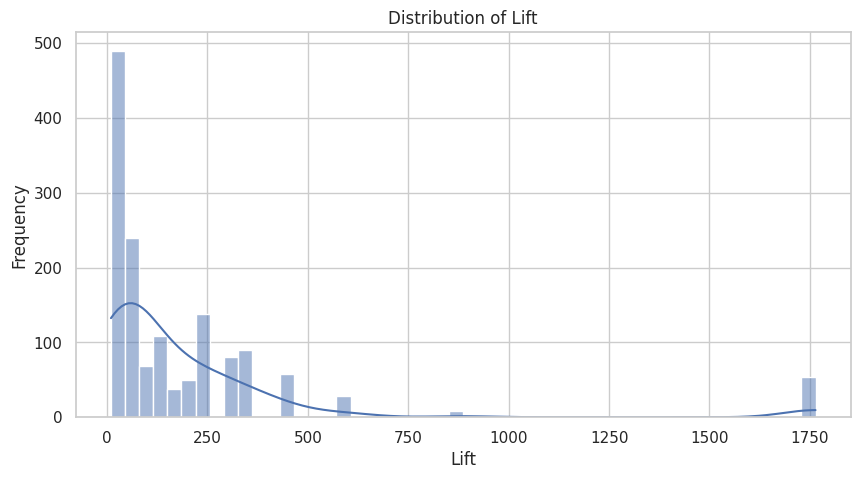

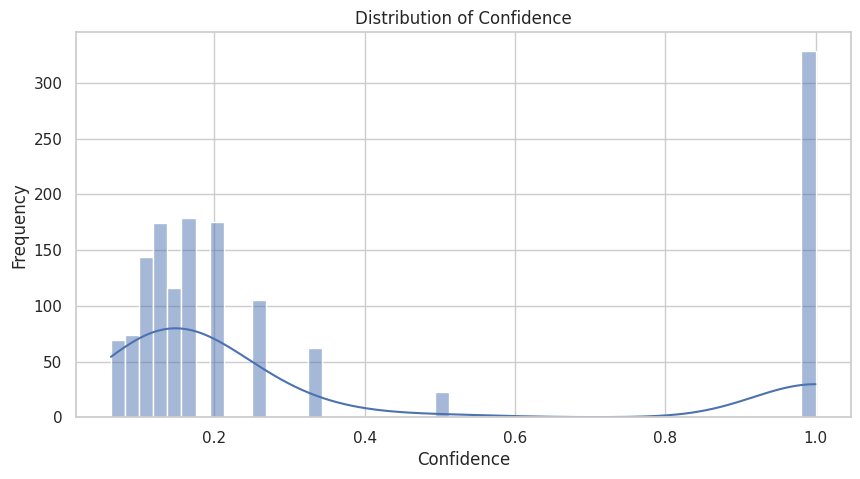

In [ ]:
# find assosiation rules

# Convert the frozensets in the rules to strings for easier searching/display
rules['antecedents_str'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents_str'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

example_product_id = 'FUR-BO-10001798' # Replace with an actual Product ID from your frequent_itemsets
rules_involving_product = rules[rules['antecedents_str'].str.contains(example_product_id) | rules['consequents_str'].str.contains(example_product_id)]

print(f"\nAssociation Rules involving '{example_product_id}':")
print(rules_involving_product[['antecedents_str', 'consequents_str', 'support', 'confidence', 'lift']].head())

# You can refine this further, e.g., just rules *leading to* this product
rules_leading_to_product = rules[rules['consequents_str'].str.contains(example_product_id)]
print(f"\nAssociation Rules leading to '{example_product_id}':")
print(rules_leading_to_product[['antecedents_str', 'consequents_str', 'support', 'confidence', 'lift']].head())

# Or rules *starting from* this product
rules_starting_from_product = rules[rules['antecedents_str'].str.contains(example_product_id)]
print(f"\nAssociation Rules starting from '{example_product_id}':")
print(rules_starting_from_product[['antecedents_str', 'consequents_str', 'support', 'confidence', 'lift']].head())

# Inspecting the most frequent items
print("\nTop 10 Frequent Items (by support):")
print(frequent_itemsets.sort_values(by='support', ascending=False).head(10))

# Analyzing the distribution of lift and confidence
plt.figure(figsize=(10, 5))
sns.histplot(rules['lift'], bins=50, kde=True)
plt.title('Distribution of Lift')
plt.xlabel('Lift')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(rules['confidence'], bins=50, kde=True)
plt.title('Distribution of Confidence')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# frequent items can we find Product name and the subcategory of them based on df
# Create a dictionary mapping Product ID to Product Name and Sub-Category

path = '/content/gdrive/MyDrive/MoovAI/stores_sales_forecasting.csv'
df_original = pd.read_csv(path , encoding='ISO-8859-1')

# Create a dictionary mapping Product ID to Product Name and Sub-Category
# Ensure unique Product IDs by dropping duplicates based on 'Product ID' before setting the index
product_info = df_original.drop_duplicates(subset=['Product ID']).set_index('Product ID')[['Product Name', 'Sub-Category']].to_dict('index')

def get_product_details(itemset, product_info_dict):
    names = []
    subcategories = []
    for product_id in itemset:
        if product_id in product_info_dict:
            names.append(product_info_dict[product_id]['Product Name'])
            subcategories.append(product_info_dict[product_id]['Sub-Category'])
        else:
            names.append(f"Unknown Name ({product_id})")
            subcategories.append(f"Unknown Sub-Category ({product_id})")
    return ", ".join(names), ", ".join(subcategories)

# Apply the function to the 'itemsets' column
# Using .apply(pd.Series) to expand the tuple into columns
frequent_itemsets[['Product Names', 'Sub-Categories']] = frequent_itemsets['itemsets'].apply(
    lambda x: get_product_details(x, product_info)
).apply(pd.Series)

print("\nFrequent Itemsets with Product Names and Sub-Categories:")
print(frequent_itemsets.sort_values(by='support', ascending=False).head())


def get_itemset_details(itemset, product_info_dict):
    names = []
    subcategories = []
    for product_id in itemset:
         if product_id in product_info_dict:
            names.append(product_info_dict[product_id]['Product Name'])
            subcategories.append(product_info_dict[product_id]['Sub-Category'])
         else:
            names.append(f"Unknown Name ({product_id})")
            subcategories.append(f"Unknown Sub-Category ({product_id})")
    return ", ".join(names), ", ".join(subcategories)

# Apply the function and expand the results into new columns for rules
rules[['Antecedent Product Names', 'Antecedent Sub-Categories']] = rules['antecedents'].apply(
    lambda x: get_itemset_details(x, product_info)
).apply(pd.Series)

rules[['Consequent Product Names', 'Consequent Sub-Categories']] = rules['consequents'].apply(
    lambda x: get_itemset_details(x, product_info)
).apply(pd.Series)


print("\nAssociation Rules with Product Names and Sub-Categories:")
# Corrected column names to lowercase 'support', 'confidence', 'lift'
print(rules[['antecedents_str', 'consequents_str', 'Antecedent Product Names', 'Consequent Product Names', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head())


Frequent Itemsets with Product Names and Sub-Categories:
      support           itemsets  \
295  0.009070  (FUR-FU-10004270)   
65   0.008503  (FUR-CH-10001146)   
93   0.008503  (FUR-CH-10002647)   
110  0.007937  (FUR-CH-10003774)   
97   0.007937  (FUR-CH-10002880)   

                                       Product Names Sub-Categories  
295    Eldon Image Series Desk Accessories, Burgundy    Furnishings  
65       Global Value Mid-Back Manager's Chair, Gray         Chairs  
93        Situations Contoured Folding Chairs, 4/Set         Chairs  
110  Global Wood Trimmed Manager's Task Chair, Khaki         Chairs  
97         Global High-Back Leather Tilter, Burgundy         Chairs  

Association Rules with Product Names and Sub-Categories:
                       antecedents_str                   consequents_str  \
1429  FUR-FU-10000576, FUR-FU-10004351  FUR-TA-10002607, FUR-FU-10002505   
1403  FUR-FU-10002116, FUR-CH-10003817  FUR-CH-10004875, FUR-CH-10003846   
1414  FUR-FU-100049

## **Using Association Rules for Promotions**

Association rules help uncover products that are frequently bought together, enabling **data-driven promotional strategies** for our furniture sales.

### **Promotional Tactics:**
- **Bundle Discounts**: Offer "Buy A, get B at discount" when lift & confidence are high.
- **Cross-Sell**: Recommend products from the consequent when the antecedent is in the cart.
- **Targeted Offers**: Send promos to customers who frequently buy items from the antecedent.
- **Smart Placement**: Place associated products near each other on the site or in-store.

## **Customer-Level**


Total unique customers: 707


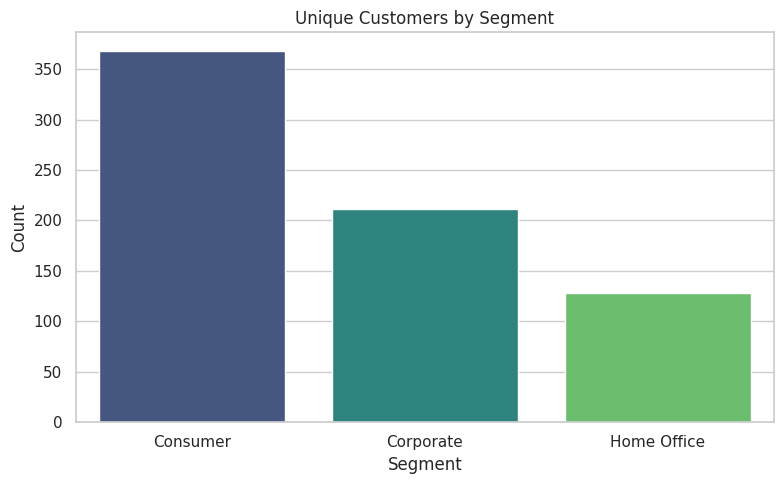

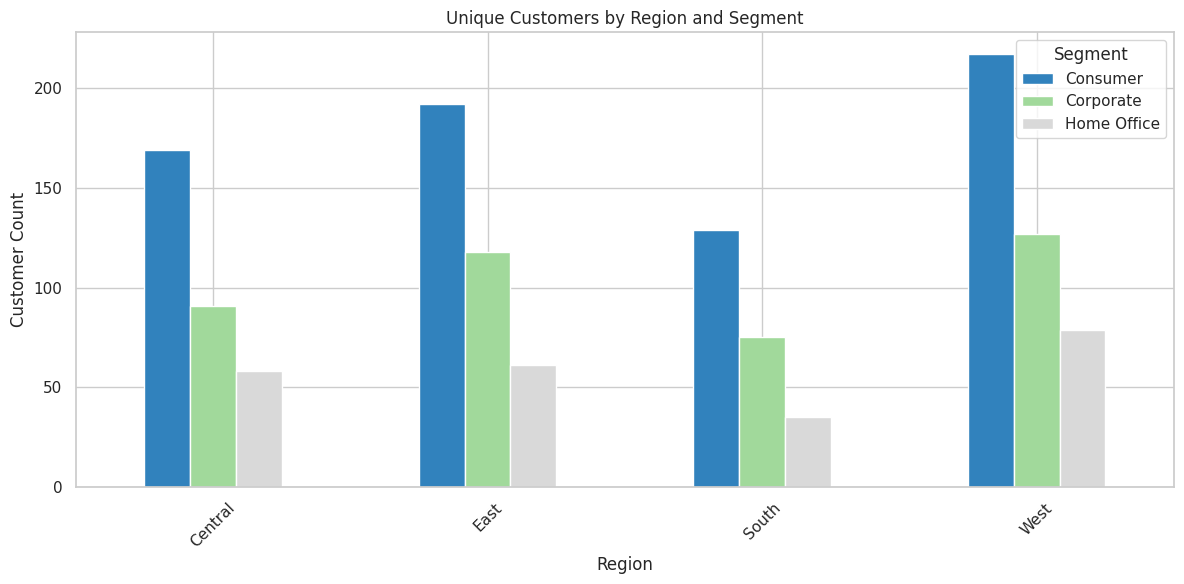

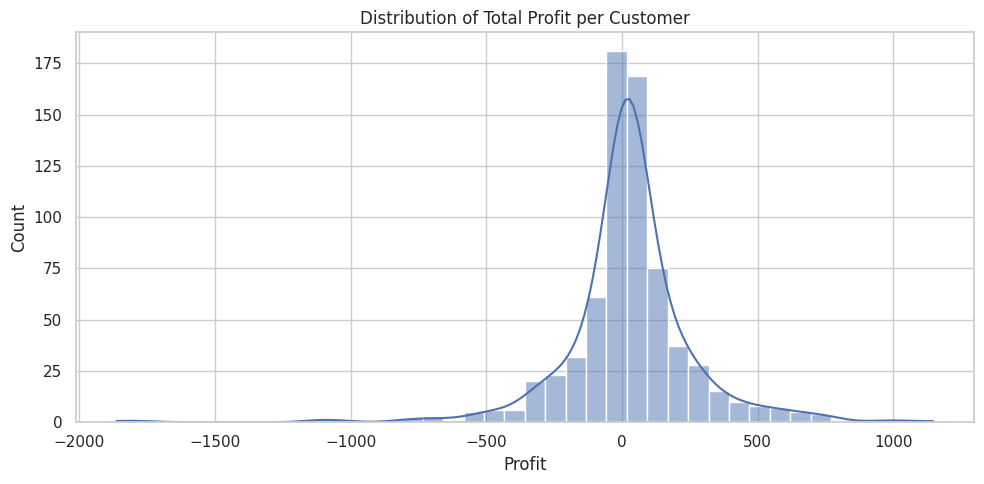

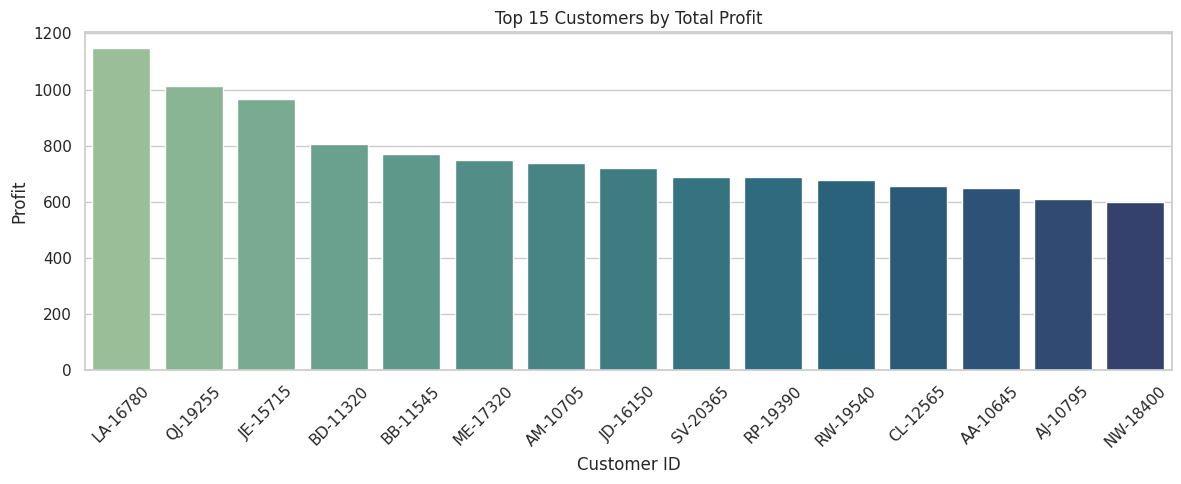

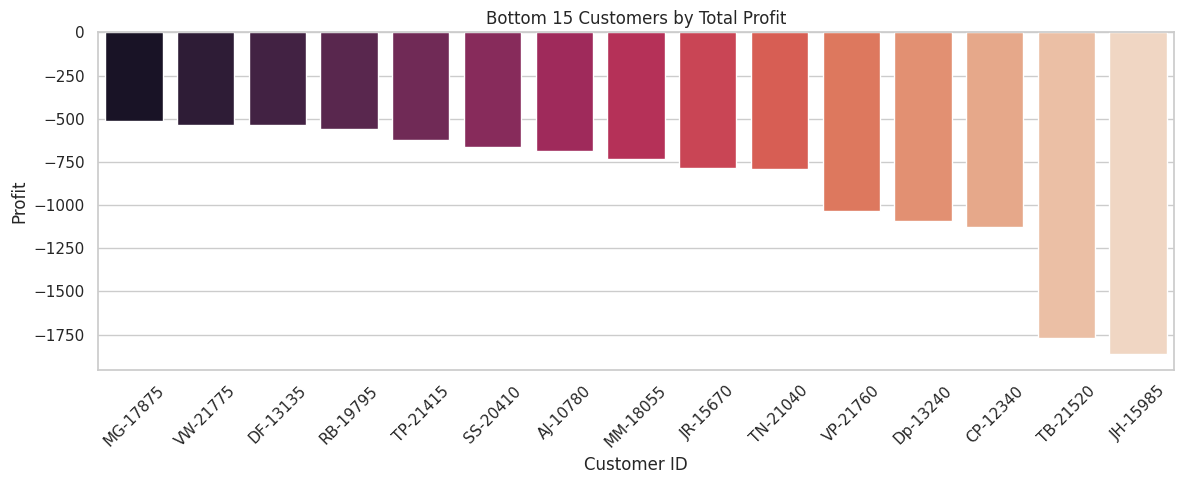

In [ ]:
# 1. Count of unique customers
unique_customers = df['Customer ID'].nunique()
print(f"Total unique customers: {unique_customers}")

# 2. Customers by Segment
segment_counts = df[['Customer ID', 'Segment']].drop_duplicates().value_counts(subset='Segment').reset_index()
segment_counts.columns = ['Segment', 'Number of Customers']
segment_counts['Percentage'] = round(100 * segment_counts['Number of Customers'] / unique_customers, 1)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Segment', y='Number of Customers', data=segment_counts, palette='viridis')
plt.title('Unique Customers by Segment')
plt.ylabel('Count')
plt.xlabel('Segment')
plt.tight_layout()
plt.show()

# 3. Customers by Region and Segment
region_segment = df[['Customer ID', 'Region', 'Segment']].drop_duplicates()
region_segment_counts = region_segment.groupby(['Region', 'Segment']).size().unstack(fill_value=0)

# Plot
region_segment_counts.plot(kind='bar', figsize=(12, 6), colormap='tab20c')
plt.title('Unique Customers by Region and Segment')
plt.ylabel('Customer Count')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Total Profit by Customer
customer_profit = df.groupby('Customer ID')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)

# Histogram of profit distribution
plt.figure(figsize=(10, 5))
sns.histplot(customer_profit['Profit'], bins=40, kde=True)
plt.title('Distribution of Total Profit per Customer')
plt.xlabel('Profit')
plt.tight_layout()
plt.show()

# Top 15 profitable customers
plt.figure(figsize=(12, 5))
sns.barplot(data=customer_profit.head(15), x='Customer ID', y='Profit', palette='crest')
plt.title('Top 15 Customers by Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bottom 15 customers (losses)
plt.figure(figsize=(12, 5))
sns.barplot(data=customer_profit.tail(15), x='Customer ID', y='Profit', palette='rocket')
plt.title('Bottom 15 Customers by Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
customer_profit_sorted = df.groupby('Customer ID')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)

# Top 10 customers
top_10_ids = customer_profit_sorted.head(10)['Customer ID'].tolist()
df_top10 = df[df['Customer ID'].isin(top_10_ids)]

top10_summary = df_top10.groupby('Customer ID').agg(
    Total_Orders=('Order ID', 'nunique'),
    Segment=('Segment', 'first'),
    Region=('Region', 'first'),
    Total_Profit=('Profit', 'sum')
).reset_index().sort_values(by='Total_Profit', ascending=False)

# Bottom 10 customers
bottom_10_ids = customer_profit_sorted.tail(10)['Customer ID'].tolist()
df_bottom10 = df[df['Customer ID'].isin(bottom_10_ids)]

bottom10_summary = df_bottom10.groupby('Customer ID').agg(
    Total_Orders=('Order ID', 'nunique'),
    Segment=('Segment', 'first'),
    Region=('Region', 'first'),
    Total_Profit=('Profit', 'sum')
).reset_index().sort_values(by='Total_Profit')

# Segment-level average quantity and profit
segment_metrics = df.groupby('Segment').agg(
    Avg_Quantity=('Quantity', 'mean'),
    Avg_Profit=('Profit', 'mean')
).reset_index()

In [ ]:
segment_metrics

,Segment,Avg_Quantity,Avg_Profit
0,Consumer,3.743037,6.281293
1,Corporate,3.862229,11.741201
2,Home Office,3.776243,10.705465


In [ ]:
bottom10_summary

,Customer ID,Total_Orders,Segment,Region,Total_Profit
3,JH-15985,1,Consumer,South,-1862.3124
7,TB-21520,3,Consumer,East,-1768.4530
1,CP-12340,2,Corporate,East,-1125.8011
2,Dp-13240,4,Home Office,South,-1094.9039
9,VP-21760,4,Corporate,West,-1034.1219
8,TN-21040,2,Home Office,West,-793.6506
4,JR-15670,1,Consumer,West,-786.7440
5,MM-18055,4,Consumer,Central,-730.9481
0,AJ-10780,3,Corporate,South,-689.6546
6,SS-20410,3,Consumer,West,-661.8046


In [ ]:
top10_summary

,Customer ID,Total_Orders,Segment,Region,Total_Profit
5,LA-16780,7,Corporate,East,1146.4878
7,QJ-19255,1,Corporate,East,1013.1270
4,JE-15715,5,Consumer,West,968.0821
2,BD-11320,5,Consumer,West,805.9840
1,BB-11545,5,Corporate,Central,770.1477
6,ME-17320,5,Home Office,South,750.2580
0,AM-10705,4,Consumer,South,738.8388
3,JD-16150,6,Corporate,Central,720.5795
9,SV-20365,9,Consumer,East,688.3981
8,RP-19390,3,Consumer,East,688.1442


## Customer-Level Insights

We analyzed customer behavior across segments, regions, and profit contribution. Below are the key findings:

### Unique Customers Overview
- The dataset contains **707 unique customers**.
- These customers are distributed across three segments: **Consumer**, **Corporate**, and **Home Office**.

### Customer Distribution by Segment & Region
- **Consumer** segment has the largest share of unique customers, followed by **Corporate** and **Home Office**.
- Across all regions, **Consumer** remains dominant, but **Corporate** customers are more prominent in the **West** and **East** regions.
- This segmentation is crucial for targeting regional marketing strategies.

### Profit Distribution per Customer
- The distribution of profit per customer is **right-skewed**, meaning:
  - A **small number of customers** contribute to the majority of the profit.
  - Many customers generate **low or even negative profit**.

### Top 10 Customers by Profit
- These top performers:
  - Placed **multiple orders**, indicating loyalty or bulk purchasing.
  - Mostly belong to the **Corporate** or **Home Office** segments.
  - Are distributed across different regions, suggesting **profit is not concentrated geographically**.

### Bottom 10 Customers by Profit
- These customers had frequent purchases but ended up **generating negative or minimal profit**.
- This could be due to:
  - High discount usage
  - High-cost items with low margins
  - Frequent returns or expensive shipping
- Majority belong to the **Consumer** segment — an indicator to monitor low-margin or high-cost customer profiles.

### Segment-Level Behavior (Quantity & Profit)
| Segment      | Avg Quantity per Order | Avg Profit per Order |
|--------------|------------------------|------------------------|
| Consumer     | 3.74                   | \$6.28                |
| Corporate    | 3.86                   | **\$11.74**           |
| Home Office  | 3.77                   | \$10.71               |

- **Corporate customers** generate the highest **average profit per order**, even though their quantity is similar to other segments.
- This suggests they purchase higher-margin products or receive fewer discounts.

---

### Strategic Takeaways:
- Prioritize **Corporate** customers for **retention and upselling** campaigns.
- Investigate **low-profit Consumer customers** to improve pricing, shipping, or discount policies.
- Use **region + segment** combinations to tailor promotional strategies.


In [ ]:
# Reference date: 1 day after the latest order date
ref_date = df['Order Date'].max() + pd.Timedelta(days=1)

# RFM Calculation
rfm = df.groupby('Customer ID').agg(
    Recency=('Order Date', lambda x: (ref_date - x.max()).days),
    Frequency=('Order ID', 'nunique'),
    Monetary=('Sales', 'sum')
).reset_index()

# Add quantile-based scores (1 to 4, where 4 = best)
rfm['R'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1]).astype(int)
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method="first"), 4, labels=[1, 2, 3, 4]).astype(int)
rfm['M'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4]).astype(int)

# Concatenate into RFM Segment
rfm['RFM_Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

# Calculate an overall RFM score
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis=1)

In [ ]:
rfm

,Customer ID,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
0,AA-10315,1203,1,14.560,1,1,1,111,3
1,AA-10375,1062,1,28.400,1,1,1,111,3
2,AA-10480,492,2,475.300,2,2,2,222,6
3,AA-10645,483,5,3750.713,2,4,4,244,10
4,AB-10015,416,2,390.672,2,2,2,222,6
...,...,...,...,...,...,...,...,...,...
702,XP-21865,492,3,811.298,2,4,3,243,9
703,YC-21895,1140,1,124.410,1,2,1,121,4
704,YS-21880,135,3,861.224,3,4,3,343,10
705,ZC-21910,55,8,3899.690,4,4,4,444,12


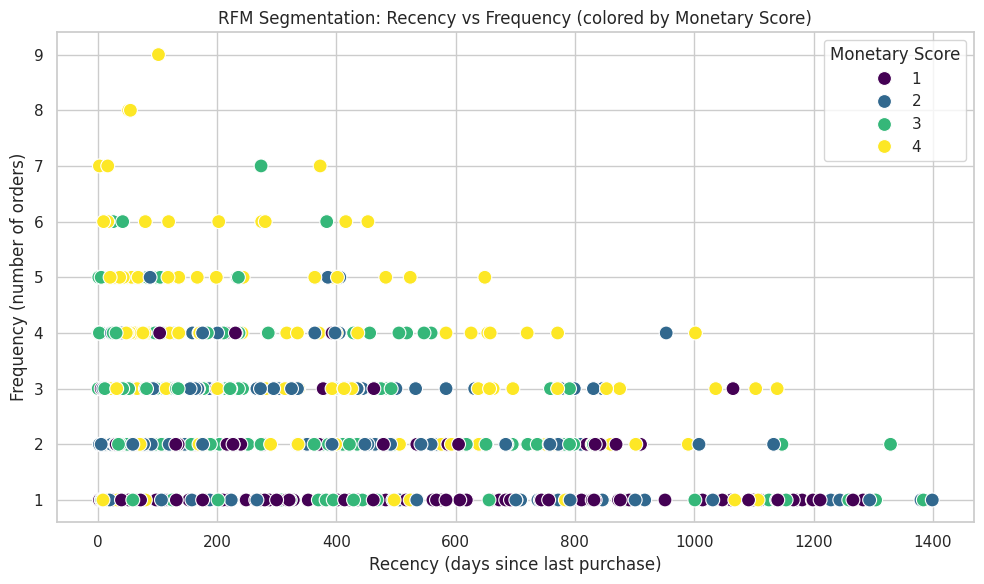

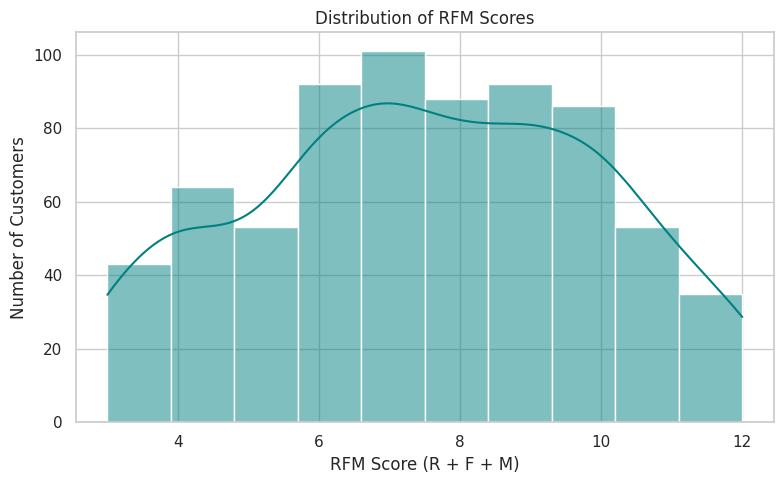

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Recency vs Frequency (colored by Monetary score)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='M', palette='viridis', s=100)
plt.title('RFM Segmentation: Recency vs Frequency (colored by Monetary Score)')
plt.xlabel('Recency (days since last purchase)')
plt.ylabel('Frequency (number of orders)')
plt.legend(title='Monetary Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: RFM Score Distribution
plt.figure(figsize=(8, 5))
sns.histplot(rfm['RFM_Score'], bins=10, kde=True, color='teal')
plt.title('Distribution of RFM Scores')
plt.xlabel('RFM Score (R + F + M)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.tight_layout()
plt.show()


## Customer-Level Insights Using RFM Analysis

To support marketing and sales strategy, we performed an **RFM (Recency, Frequency, Monetary)** analysis to classify our customers based on their purchase behavior. RFM helps identify customer segments that are:

- Highly loyal and profitable
- At risk of churn
- Newly acquired
- Ready for reactivation

### Key RFM Findings
Each customer receives a score from 1 (lowest) to 4 (highest) for:
- **Recency (R):** How recently they purchased
- **Frequency (F):** How often they purchased
- **Monetary (M):** How much they spent

An **RFM Segment** like `444` means:
- Purchased very recently
- Buy frequently
- Spend a lot  
These are your **best customers**.

### How to Use RFM for Promotions

| Segment Type | RFM Profile | Strategy |
|--------------|-------------|----------|
| Champions | 444, 443     | Exclusive offers, early access to new products |
| Loyal Customers | 344, 434 | Loyalty programs, subscription offers |
| At Risk | 144, 244     | Reactivation campaigns, win-back discounts |
| Lost or Dormant | 111, 112 | Low-cost re-engagement via email/SMS |
| New Customers | 411, 311 | Onboarding drip campaigns, personalized welcome |

### Business Value
- Aligns **marketing budget** with customer value.
- Increases **ROI** by targeting promotions to the right groups.
- Reduces **churn** by identifying at-risk but high-value customers.
- Supports **personalization** based on actual purchasing behavior.

This analysis bridges your **sales forecasting** with actionable **customer segmentation**, ensuring your business decisions are both data-driven and goal-aligned.


# **Questions**

## **Q1**

Q1: Préparation des données: Comme c’est souvent le cas dans les projets, le jeu de données peut nécessiter quelques manipulations pour être utilisable par une approche ML.

- Si tu rencontres des problèmes de qualité des données durant ta manipulation des données de ventes, comment les as-tu résolus?

**Answer**:

During preprocessing, we cleaned and transformed the dataset to make it usable for forecasting and insights. Specifically:

- Dropped irrelevant columns like `Row ID`, `Category`, `Postal Code` which did not contribute to the time series prediction or were too granular and sparse.

- Aggregated data by `Order ID` and then resampled it by month to create a clear time series for forecasting total monthly sales.

- Created engineered features such as: Order_Year, Order_Month, Order_Weekday, Is_Weekend, Is_Holiday_US, Margin, Cost, Actual Price, Discount level


• Limite-toi aux trois enjeux les plus pertinents selon toi (appuie-toi avec un visuel).

**Answer**:

1. Highly Skewed Sales Distribution: Sales values have a long tail with a few high-value transactions. A log transformation would stabilize variance but we avoided it to keep the values interpretable for stakeholders.


2. Missing and Duplicate Values: Handled missing values by checking for context and dropping or imputing as needed. Ensured unique identifiers like `Order ID` and `Customer ID` are consistent.


3. Data Granularity and Aggregation: Original data is at order-line level (multiple lines per order), which must be aggregated per order before being grouped monthly. Failure to aggregate would double-count and misrepresent sales figures.


• Est-ce que les insights trouvés peuvent être transformés en features qui faciliteront l'apprentissage du modèle ML?

**Answer**:

Yes, several insights were converted into features that help model training and interpretation. For example:

- Temporal signals like `month`, `day of week`, `holidays` helped capture seasonality and behavior changes.

- `cost`, `margin`, `price` features reveal economic signals like promotion effects or underperforming products.

- Segment and region insights could be used in multi-series forecasting (if more data were available).

- Customer metrics like `frequency`, `recency`, and `profit` helped in customer segmentation and potential demand modeling.


## **Q2**

Question #2 : Insights et interprétation
Identifie des insights qui, selon toi, peuvent contribuer à comprendre les variations des ventes.

- En tenant compte des parties prenantes visées par ta solution, comment interprètes-tu les résultats produits par ta solution ML? Comment cette solution ajoute-t-elle de la valeur pour ces parties prenantes?

- Selon toi, comment envisage-tu que les parties prenantes vont utiliser ta solution pour tenter de comprendre comment augmenter les ventes?

**Answer:**

Segmented Insight Approach: `When`, `Where`, `What`, `Who`, `How`
To better structure insights and decision points, we segmented the analysis into three levels, each providing a different lens on the business.

1. Order-Level: When & Where
Insight: Sales show strong monthly seasonality, especially year-end spikes (e.g., November–December). Managers can adjust stock levels and staff scheduling during high-volume periods. Enables budget planning and campaign timing.


2. Customer-Level: Who & How Often
The top 10% of customers generate a disproportionately high profit. Focused loyalty programs or personalized promotions can increase retention and revenue. Helps identify and nurture high-value segments. We also computed `Customer Lifetime Value (CLV)` and used RFM segmentation to distinguish between: `Repeat vs. one-time buyers`, and `High-value vs. low-value customers`

3. Product-Level: What
Using `association rules`, we found frequent product bundles (e.g., binders + paper). Use “Buy X, get Y” promotions to increase basket size. Supports cross-sell strategies and product placement decisions.


### How the ML Solution Supports Stakeholders

The ML time series model (SARIMAX) provides monthly sales forecasts with confidence intervals, enabling:

- Sales Managers to estimate future revenues and plan promotions

- Inventory Planners to align supply with demand

- Executives to set regional targets and budgets

In addition, unsupervised models like KMeans and frequent pattern mining offer descriptive insights that help tailor campaigns and pricing.

### How Stakeholders Use This to Boost Sales:

- Launching promotions before expected sales dips (based on trend forecasts)

- Allocating budget by region/segment to maximize ROI

- Offering personalized discounts to high-margin, loyal customers

- Pairing frequently co-purchased products in marketing banners or store layouts



## **Q3**

Question #3 : Solution ML: Décris l'approche ML que tu as utilisé pour prévoir les ventes. Pourquoi as-tu choisi cette approche? Quels sont les avantages et les inconvénients de cette approche?

**Answer:**

To forecast future sales, I used the SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous variables) model — a traditional time series forecasting method designed to capture trend, seasonality, and noise.

### Why SARIMAX?

The main reason for choosing SARIMAX over machine learning or deep learning approaches is the limited data available:

- We only have 48 monthly data points, which is not sufficient for training supervised ML models that require more data to generalize well.

- SARIMAX is better suited for small datasets and well-behaved seasonal patterns.

### Advantages:

- Handles seasonality and trend explicitly.

- Works well with low data volume.

- Interpretable: Components (trend, seasonality, residual) can be visualized and explained to business stakeholders.

- Fast to train and tune, especially with grid search on hyperparameters.

### Limitations:
- Not scalable for high-frequency or high-dimensional data.

- Doesn’t easily accommodate exogenous features or nonlinear patterns without careful design.

- Performance may degrade in presence of structural breaks (e.g., major external shocks).



##Q4

Question #4 : Dégradation de la performance: Imaginons que ta solution est déployée et roule maintenant en production. Tu remarques que la performance de ton modèle se dégrade progressivement depuis les derniers mois. De plus, tu identifies également certaines variables dont les valeurs semblent avoir évolué durant la même période. Selon toi, quelle serait une raison qui explique cette situation et comment la résoudrais-tu?

**Answer:**

If the model’s performance starts degrading over time, there are several possible reasons. In the context of our SARIMAX forecasting solution, one likely cause is data drift — a change in the underlying sales patterns due to external or internal factors that were not present in the training data.

### Potential Cause:

- Shift in sales dynamics: Changes in customer behavior, new marketing strategies, supply chain disruptions, or pricing updates may lead to new patterns in the data.

- Changes in variable distributions: For example, an increase in average discount or a shift in product popularity (e.g., a new product line) could impact the seasonality or trend components the model learned.

### Solution Strategy:

- Monitoring & Retraining: Implement a monitoring pipeline to track key metrics (MAE, MAPE, AIC) and detect degradation early. Set performance thresholds to trigger model retraining or recalibration.

- Rolling Forecasts & Window Updates: Use rolling time windows (e.g., last 24 or 36 months) to keep the model relevant and adapt to recent data trends while discarding outdated patterns.

- Feature Reassessment: Reevaluate exogenous variables (e.g., promotions, holidays, economic events) to check if new patterns are explainable and could be integrated into the model.

- Model Upgrade: If structural changes are too complex for SARIMAX, consider switching to more flexible ML models (e.g., XGBoost, Prophet, or LSTM) once more data becomes available.

## Q5

Question #5 : Intégration de l'IA générative: Comment l'IA générative pourrait-elle être intégrée dans un système de prévision des ventes pour soutenir les utilisateurs finaux de ce modèle?
- Donne un exemple d'architecture où l'IA générative pourrait être utilisée.
- Propose un exemple de prompt qui pourrait être utilisé pour interagir avec l'IA générative.

** Answer:**

### How Generative AI Can Support End Users

Generative AI can act as a natural language interface between business users (e.g., store managers, marketing analysts) and complex forecasting models. It helps users:

- Understand forecasts and trends in simple terms.

- Ask follow-up questions (e.g., “Why did sales drop last month?”).

- Generate action plans based on data insights.

- Simulate "what-if" scenarios (e.g., “What happens if we increase discounts?”).

### Example Architecture with Generative AI

Here’s a simplified architecture of an interactive AI-powered forecasting assistant:

 CSV File (Sales Data)
     ⬇
 Forecasting Engine (Prophet / SARIMAX)
     ⬇
 Time Series Results
     ⬇
 LangChain (Orchestration Layer)
     ⬇
 LLM (OpenAI GPT)
     ⬇
 User Interface (Streamlit App)
     ⬆
 ngrok (Public Access)

### Technologies Used

Package	Purpose
- `streamlit`:	Lightweight Python web app framework to build an interactive UI.
- `openai`:	Access to GPT models for generating responses to user queries.
- `langchain`:	Agent: and chain management to let the LLM interact with the forecast.
- `pyngrok`:	Makes the local Streamlit app publicly accessible via a tunnel (for demo or deployment).


### Example Prompt for Generative AI Interface

"Based on the forecast, can you explain why sales might decrease in the summer months and suggest a targeted marketing strategy for the Corporate segment in the West region?"


"Show me which subcategories performed best last year and how they’re expected to grow next quarter."


# **LLM Agents**

In [4]:
!pip install streamlit prophet openai langchain pyngrok
!pip install openai pandas langchain==0.1.16
!pip install langchain==0.1.16
!pip install --upgrade pip
!pip install openai pandas streamlit prophet pyngrok
!pip install langchain==0.1.16
!pip install langchain-experimental

In [7]:
import langchain
print(langchain.__version__)

0.3.27


In [12]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from prophet import Prophet
from langchain_experimental.agents import create_pandas_dataframe_agent
from langchain.chat_models import ChatOpenAI
import os

# Set your OpenAI API key (DON'T hardcode in production)
os.environ["OPENAI_API_KEY"] = "API_Key"
st.title("AI-Powered Sales Forecasting, Simulation & Assistant")

# 1. File Upload
uploaded_file = st.file_uploader("Upload your sales file", type=["csv", "xlsx"])

if uploaded_file:
    if uploaded_file.name.endswith(".csv"):
        try:
            df = pd.read_csv(uploaded_file, encoding='utf-8', sep=',', skipinitialspace=True)
        except:
            df = pd.read_csv(uploaded_file, encoding='ISO-8859-1', sep=',', skipinitialspace=True)
    elif uploaded_file.name.endswith(".xlsx"):
        df = pd.read_excel(uploaded_file)

    df.columns = df.columns.str.strip()
    st.write("Detected columns:", df.columns.tolist())
    st.write(df.head())

    # 2. Forecasting with Prophet
    if 'Order Date' in df.columns and 'Sales' in df.columns:
        st.subheader(" Forecasting with Prophet")
        forecast_df = df[['Order Date', 'Sales']].copy()
        forecast_df.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)
        forecast_df['ds'] = pd.to_datetime(forecast_df['ds'])

        model = Prophet()
        model.fit(forecast_df)

        future = model.make_future_dataframe(periods=30)
        forecast = model.predict(future)

        fig1 = model.plot(forecast)
        st.pyplot(fig1)
    else:
        st.warning("For forecasting, 'Order Date' and 'Sales' columns are required.")

    # 3. Discount Simulation
    if all(col in df.columns for col in ['Discount', 'Sales', 'Profit']):
        st.subheader(" Discount Scenario Simulation")
        avg_discount = st.slider("Set a new average discount (%)", 0, 50, 10)
        df_sim = df.copy()
        df_sim['New Sales'] = df_sim['Sales'] * (1 + (avg_discount - df_sim['Discount']) / 100)
        df_sim['New Profit'] = df_sim['Profit'] * (1 + (avg_discount - df_sim['Discount']) / 100)

        st.write(df_sim[['Discount', 'Sales', 'Profit', 'New Sales', 'New Profit']].head())
    else:
        st.warning("For discount simulation, ensure 'Discount', 'Sales', and 'Profit' columns exist.")

    # 4. LLM Agent Q&A
    st.subheader(" Ask Questions About Your Data")
    question = st.text_input("Type your question:")
    if question:
        try:
            llm = ChatOpenAI(temperature=0)
            agent = create_pandas_dataframe_agent(
                llm=llm,
                df=df,
                verbose=True,
                handle_parsing_errors=True,
                allow_dangerous_code=True  # Required for recent versions
            )
            response = agent.run(question)
            st.success(response)
        except Exception as e:
            st.error(f"LLM Assistant Error: {str(e)}")

else:
    st.info("Please upload a CSV file to begin.")


Overwriting app.py


In [13]:
!ngrok authtoken 2y3523zNr8WQtYX2oKrVFaw58X7_2Y1QReDm45wRetp4qXZpR

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [16]:
from pyngrok import ngrok

# Kill existing tunnels
ngrok.kill()

# Run Streamlit in background
get_ipython().system_raw('streamlit run app.py &')

# Connect ngrok tunnel on port 8501 (integer, NOT string)
public_url = ngrok.connect(8501)
print("Streamlit app URL:", public_url)

Streamlit app URL: NgrokTunnel: "https://77fe8d6be89c.ngrok-free.app" -> "http://localhost:8501"
